<a href="https://colab.research.google.com/github/LucasLacerda-git/-An-lise-de-Segmenta-o-de-Clientes-com-K-Means-e-Modelo-Preditivo/blob/main/An%C3%A1lise_de_Personalidade_do_cliente_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Análise de Personalidade do Cliente - Campanha de Marketing

**Objetivo**: Explorar padrões de consumo, segmentação de clientes e eficácia de campanhas em um dataset de marketing com 2.240 registros. Separar por clusters e criar um modelo de predição.

**Contexto do Dataset**
Os dados incluem informações demográficas (idade, renda, estado civil), hábitos de compra (vinhos, produtos orgânicos, carne etc.) e resposta a campanhas anteriores.

**Variáveis-chave:**

Income (Renda)

MntWines (Gasto com vinhos)

NumWebPurchases (Compras online)

Response (Se aceitou a última campanha)

Autor - Lucas Lacerda












---



###ImportandoBibliotecas

In [ ]:
!pip install plotly
# importando plotly

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Biblioteca de analise,Computação númerica, visualização

In [ ]:
df= pd.read_csv("marketing_campaign.csv",sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


###Conhecimento dos dados

In [ ]:
df.shape
#verificando o tamanho do df

(2240, 29)

In [ ]:
df.isnull().sum()
#analisando valores nulos

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]
#verificação macro

,0
Income,24


In [ ]:
df.dtypes
#natureza dos dados

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
df.describe()
#resumo estatistico

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Gerando o boxplot para cada coluna numérica
for col in numerical_columns:
    fig = px.box(df, y=col, title=f"Boxplot de {col}")
    fig.show()

Percebe-se que há outliers, que devem ser tratados.

In [ ]:
fig = px.box(df, y='Income', title='Distribuição de Renda')
fig.show()
#boxplot

In [ ]:
summary = df['Income'].describe()
print(summary)
#resumo estatistico

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


In [ ]:
def count_outliers(df, columns):
    outliers_count = {}
#função para contar outliers utilizando IQR

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        #calculando o IQR

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # definindo os limites inferior e superior

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]
        #contando o número de outliers

    return outliers_count

numerical_columns = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth','AcceptedCmp5','AcceptedCmp4',
                     'AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','Complain','Response',]
#selecionando as colunas numéricas

outliers_count = count_outliers(df, numerical_columns)
#contando os outliers

for col, count in outliers_count.items():
    print(f"Coluna '{col}' tem {count} outliers.")
#exibindo o número de outliers por coluna


Coluna 'Year_Birth' tem 3 outliers.
Coluna 'Income' tem 8 outliers.
Coluna 'MntWines' tem 35 outliers.
Coluna 'MntFruits' tem 227 outliers.
Coluna 'MntMeatProducts' tem 175 outliers.
Coluna 'MntFishProducts' tem 223 outliers.
Coluna 'MntSweetProducts' tem 248 outliers.
Coluna 'MntGoldProds' tem 207 outliers.
Coluna 'NumDealsPurchases' tem 86 outliers.
Coluna 'NumWebPurchases' tem 4 outliers.
Coluna 'NumCatalogPurchases' tem 23 outliers.
Coluna 'NumWebVisitsMonth' tem 8 outliers.
Coluna 'AcceptedCmp5' tem 163 outliers.
Coluna 'AcceptedCmp4' tem 167 outliers.
Coluna 'AcceptedCmp3' tem 163 outliers.
Coluna 'AcceptedCmp2' tem 30 outliers.
Coluna 'AcceptedCmp1' tem 144 outliers.
Coluna 'Complain' tem 21 outliers.
Coluna 'Response' tem 334 outliers.


In [ ]:
total_registros = df.shape[0]
#número total de registros no DataFrame

outliers_por_coluna = {
    'Year_Birth': 3,
    'Income': 8,
    'MntWines': 35,
    'MntFruits': 227,
    'MntMeatProducts': 175,
    'MntFishProducts': 223,
    'MntSweetProducts': 248,
    'MntGoldProds': 207,
    'NumDealsPurchases': 86,
    'NumWebPurchases': 4,
    'NumCatalogPurchases': 23,
    'NumWebVisitsMonth': 8,
    'AcceptedCmp5': 163,
    'AcceptedCmp4':167,
    'AcceptedCmp3':163,
    'AcceptedCmp2':30,
    'AcceptedCmp1':144,
    'Complain':21,
    'Response':334


}
#dicionário com o número de outliers por coluna

porcentagem_outliers = {col: (outliers / total_registros) * 100 for col, outliers in outliers_por_coluna.items()}
#calcular a porcentagem de outliers para cada coluna

for col, pct in porcentagem_outliers.items():
    print(f"Coluna {col} tem {pct:.2f}% de outliers")
#exibir a porcentagem de outliers por coluna


#verificando se a quantidade deoutliers ultrapassam os 5%
#se sim então não é recomendado retira-lo pois pode impactar no modelo.
#se não eles podem ser retirados para uma análise minunciosa especifica separadamnte


Coluna Year_Birth tem 0.13% de outliers
Coluna Income tem 0.36% de outliers
Coluna MntWines tem 1.56% de outliers
Coluna MntFruits tem 10.13% de outliers
Coluna MntMeatProducts tem 7.81% de outliers
Coluna MntFishProducts tem 9.96% de outliers
Coluna MntSweetProducts tem 11.07% de outliers
Coluna MntGoldProds tem 9.24% de outliers
Coluna NumDealsPurchases tem 3.84% de outliers
Coluna NumWebPurchases tem 0.18% de outliers
Coluna NumCatalogPurchases tem 1.03% de outliers
Coluna NumWebVisitsMonth tem 0.36% de outliers
Coluna AcceptedCmp5 tem 7.28% de outliers
Coluna AcceptedCmp4 tem 7.46% de outliers
Coluna AcceptedCmp3 tem 7.28% de outliers
Coluna AcceptedCmp2 tem 1.34% de outliers
Coluna AcceptedCmp1 tem 6.43% de outliers
Coluna Complain tem 0.94% de outliers
Coluna Response tem 14.91% de outliers


Há um numero significativo de outliers acima dos 5%., então a remoção pode gerar impacto dependendo da condição...Portanto todos os outliers serão separados (5%+)para uma analise mais criteriosa buscando entender se fazem parte de um novo grupo, uma espécie decliente vip, se estão correlacionados.

Sendo adicionado:
* Year_Birth
* Income 'MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntSweetProducts
* MntGoldProds
* NumDealsPurchases
* NumWebPurchases
* NumCatalogPurchases
* NumWebVisitsMonth
* AcceptedCmp5
* AcceptedCmp4
* AcceptedCmp3
* AcceptedCmp2
* AcceptedCmp1
* Complain
* Response

In [ ]:
df_out = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth','AcceptedCmp5','AcceptedCmp4',
                     'AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','Complain','Response',]
# definir as colunas com mais de 5% de outliers


df_out = df[
    (df['MntFruits'] > df['MntFruits'].quantile(0.75) + 1.5 * (df['MntFruits'].quantile(0.75) - df['MntFruits'].quantile(0.25))) |
    (df['MntMeatProducts'] > df['MntMeatProducts'].quantile(0.75) + 1.5 * (df['MntMeatProducts'].quantile(0.75) - df['MntMeatProducts'].quantile(0.25))) |
    (df['MntFishProducts'] > df['MntFishProducts'].quantile(0.75) + 1.5 * (df['MntFishProducts'].quantile(0.75) - df['MntFishProducts'].quantile(0.25))) |
    (df['MntSweetProducts'] > df['MntSweetProducts'].quantile(0.75) + 1.5 * (df['MntSweetProducts'].quantile(0.75) - df['MntSweetProducts'].quantile(0.25))) |
    (df['MntGoldProds'] > df['MntGoldProds'].quantile(0.75) + 1.5 * (df['MntGoldProds'].quantile(0.75) - df['MntGoldProds'].quantile(0.25))) |
    (df['NumDealsPurchases'] > df['NumDealsPurchases'].quantile(0.75) + 1.5 * (df['NumDealsPurchases'].quantile(0.75) - df['NumDealsPurchases'].quantile(0.25))) |
    (df['NumCatalogPurchases'] > df['NumCatalogPurchases'].quantile(0.75) + 1.5 * (df['NumCatalogPurchases'].quantile(0.75) - df['NumCatalogPurchases'].quantile(0.25))) |
    (df['NumWebVisitsMonth'] > df['NumWebVisitsMonth'].quantile(0.75) + 1.5 * (df['NumWebVisitsMonth'].quantile(0.75) - df['NumWebVisitsMonth'].quantile(0.25))) |
    (df['AcceptedCmp5'] > df['AcceptedCmp5'].quantile(0.75) + 1.5 * (df['AcceptedCmp5'].quantile(0.75) - df['AcceptedCmp5'].quantile(0.25))) |
    (df['AcceptedCmp4'] > df['AcceptedCmp4'].quantile(0.75) + 1.5 * (df['AcceptedCmp4'].quantile(0.75) - df['AcceptedCmp4'].quantile(0.25))) |
    (df['AcceptedCmp3'] > df['AcceptedCmp3'].quantile(0.75) + 1.5 * (df['AcceptedCmp3'].quantile(0.75) - df['AcceptedCmp3'].quantile(0.25))) |
    (df['AcceptedCmp2'] > df['AcceptedCmp2'].quantile(0.75) + 1.5 * (df['AcceptedCmp2'].quantile(0.75) - df['AcceptedCmp2'].quantile(0.25))) |
    (df['AcceptedCmp1'] > df['AcceptedCmp1'].quantile(0.75) + 1.5 * (df['AcceptedCmp1'].quantile(0.75) - df['AcceptedCmp1'].quantile(0.25))) |
    (df['Complain'] > df['Complain'].quantile(0.75) + 1.5 * (df['Complain'].quantile(0.75) - df['Complain'].quantile(0.25))) |
    (df['Response'] > df['Response'].quantile(0.75) + 1.5 * (df['Response'].quantile(0.75) - df['Response'].quantile(0.25)))

]
# criação de uma máscara para identificar os outliers em cada uma dessas colunas


# verificar o número de registros
df_out.shape

(1023, 29)

In [ ]:
df_out

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,2,0,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,...,9,1,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0


In [ ]:
df_out.to_csv('df_out.csv', index=False)

* A base de dados é composta por 2.240 registros e 29 features. A variável Income apresenta 24 valores nulos, os quais precisam ser tratados para evitar distorções nas análises. A recomendação é substituir esses valores pela mediana, a fim de evitar que os outliers influenciem negativamente e, ao mesmo tempo, manter a coerência com a distribuição central da renda dos clientes.

Além disso, a coluna Dt_Customer (data de cadastro) está no formato object e necessita ser convertida para o tipo datetime. Isso permitirá a manipulação e análise temporal dos dados, como a medição da recência dos clientes, facilitando a segmentação e a análise de comportamento.

Há tambem um número significaivo de valores fora do padrão no df. Esses valores serão anlisados separadamente quando fazerem parte dos 5%acima, e serão apagados quando não alcançarem esse resultado, pois não tem significancia real.



---



### Análisando outliers

In [ ]:
df_out

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,2,0,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,...,9,1,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0


In [ ]:
fig = px.scatter(
    df_out,
    x='Income',
    y='MntGoldProds',
    color='Education',
    hover_data=['Year_Birth', 'Marital_Status', 'Education']
)
fig.show()

#analisando se há clientes com alto gasto mesmo com renda baixa ou alta, buscando perfis
#utilizando adesão de produtos gold, eeducação

A adesão de produtos de ouro é perpendicular ao nivel de escolaridade , idade e renda.Auma concentração na quantidade de gastos(50) , entre renda de 25k e 85k.

In [ ]:
fig = px.box(
    df_out,
    x='Education',
    y='MntGoldProds',
    color='Education'
)
fig.show()
 #educação e produtos ouro

In [ ]:
fig = px.scatter(
    df_out,
    x='Income',
    y='MntWines',
    color='Education',
    hover_data=['Year_Birth', 'Marital_Status', 'Education']
)
fig.show()
#

In [ ]:
fig = px.box(
    df_out,
    x='Education',
    y='MntWines',
    color='Education'
)
fig.show()
 #educação e produtos ouro

háum número muito baixo de pessoas com pouca idade mesmo que graduado. Ou seja, esses clientes com gastos elevados são clientes com graduação consideravel, com idade avançada,o cliente de nivel baixo é um outlier referente ao seu rotulo mais n ao demais. Da mesma forma referente aos clientes phd.

É possível que o comportamento de consumo esteja mais ligado ao estilo de vida e maturidade (idade) do que à formação acadêmica.

In [ ]:
from datetime import datetime

In [ ]:
ano_atual = datetime.now().year
df_out['Idade'] = ano_atual - df_out['Year_Birth']

/tmp/ipython-input-23-675585313.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def faixa_etaria(idade):
    if idade < 30:
        return 'Jovem'
    elif idade < 40:
        return 'Adulto'
    elif idade < 60:
        return 'Maduro'
    else:
        return 'Sênior'

df_out['Faixa_Idade'] = df_out['Idade'].apply(faixa_etaria)
#criando faixa de idadepara facilitar

/tmp/ipython-input-24-2683744764.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_out

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Idade,Faixa_Idade
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,68,Sênior
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,3,11,1,51,Maduro
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,0,0,0,3,11,0,75,Sênior
12,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,0,0,0,0,0,3,11,0,66,Sênior
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,0,1,1,0,0,3,11,1,79,Sênior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,...,0,0,0,0,0,3,11,0,41,Maduro
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,58,Maduro
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,79,Sênior
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,44,Maduro


In [ ]:
fig = px.scatter(
    df_out,
    x='Idade',
    y='MntWines',  # ou MntGoldProds, ou soma dos gastos
    color='Education',
    hover_data=['Income', 'Education']
)
fig.show()
#grafico de dispersão consumo e idade

In [ ]:
fig = px.box(
    df_out,
    x='Faixa_Idade',
    y='MntWines',
    color='Faixa_Idade',
    points='all'
)
fig.show()
#comparando faixa etaria por consumo

In [ ]:
fig = px.box(
    df_out,
    x='Education',
    y='MntWines',
    color='Education',
    points='all'
)
fig.show()
#boxplot consumo por escolaridade

In [ ]:
fig = px.scatter(
    df_out,
    x='Income',
    y='MntMeatProducts',
    color='Education',
    hover_data=['Year_Birth', 'Marital_Status', 'Education']
)
fig.show()

In [ ]:
fig = px.box(
    df_out,
    x='Education',
    y='MntMeatProducts',
    color='Education'
)
fig.show()
 #educação e produtos ouro

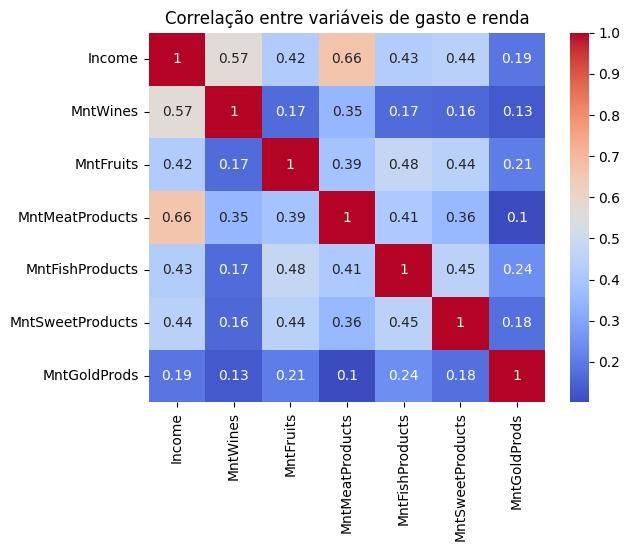

In [ ]:
cols = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

sns.heatmap(df_out[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis de gasto e renda')
plt.show()
#matriz de correlação entre gastos e renda

Aparentemente:
A idade é um fator preditivo mais relevante que escolaridade,
O comportamento de consumo está mais ligado à estabilidade (faixa etária)

Proximo passo - verificar se o estado civil também está associado a esse padrão de estabilidade e maior consumo.

In [ ]:
fig = px.box(
    df_out,
    x='Marital_Status',
    y='MntWines',
    color='Marital_Status',
    points='all'
)
fig.show()
#estado civil e consumo

Pessoas casadas tem o consumo mais alto seguido de união estaveis depois divorciados, solteiros e assim sucessivamente.

In [ ]:
df_out.groupby('Marital_Status')[['MntWines', 'MntMeatProducts', 'MntGoldProds']].mean().sort_values(by='MntWines', ascending=False)
#avaliação descritiva pela media

,MntWines,MntMeatProducts,MntGoldProds
Marital_Status,,,
Widow,513.292683,285.414634,83.195122
Divorced,501.279279,243.675676,75.333333
Together,500.705882,296.372549,68.043137
Married,499.415144,293.885117,69.751958
Single,465.139738,314.096070,68.056769
Absurd,355.500000,312.500000,204.000000
YOLO,322.000000,50.000000,42.000000
Alone,15.000000,8.000000,20.000000


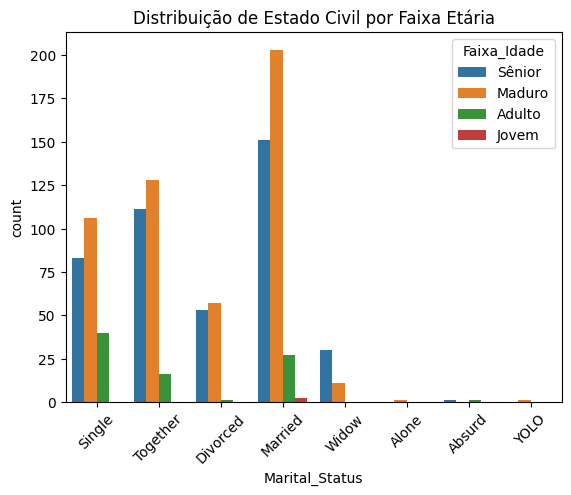

In [ ]:
sns.countplot(data=df_out, x='Marital_Status', hue='Faixa_Idade')
plt.xticks(rotation=45)
plt.title('Distribuição de Estado Civil por Faixa Etária')
plt.show()

**Análise de Perfil de Consumo e Estabilidade Pessoal**

A análise dos consumidores classificados como outliers revelou que o padrão de alto consumo não está diretamente atrelado ao nível educacional. Pelo contrário, observou-se que o maior consumo está concentrado entre clientes com mais de 40 anos de idade — especialmente os classificados como "Maduro" (40–59 anos) e "Sênior" (60+).

Ao cruzar essas informações com o estado civil, percebe-se que viúvos, divorciados, casados e pessoas em união estável são os maiores consumidores médios de vinhos, carnes e produtos de ouro, superando significativamente os solteiros. Isso sugere que o comportamento de consumo elevado está fortemente vinculado a estabilidade financeira e fase da vida, e não necessariamente à escolaridade.

Comportamentos supostamente "fora da curva" revelam, portanto, padrões legítimos de consumo de uma população madura, financeiramente estável e com preferências consolidadas — o que reforça a importância de olhar para os dados de forma contextualizada e segmentada por estilo de vida.

A distribuição dos dados fora dos limites do boxplot (Q3 + 1.5*IQR) forma uma calda linear e contínua em muitos casos — indicando não se tratar de ruído, mas de um segmento autêntico de clientes com alto poder de compra.

No entanto, foi identificada a presença de valores extremamente esparsos e isolados ao final da calda — geralmente entre 1 a 5 pontos por variável, os quais não acompanham a tendência e podem distorcer análises futuras (como visualizações, clusterização e modelos supervisionados).

### Preprocessamento outliers

In [ ]:
df_copy = df.copy()
#criando backup

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
#gerando boxplot para cada coluna

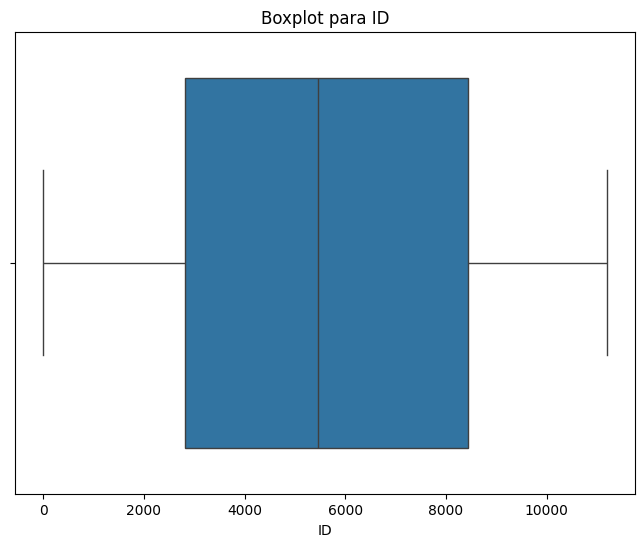

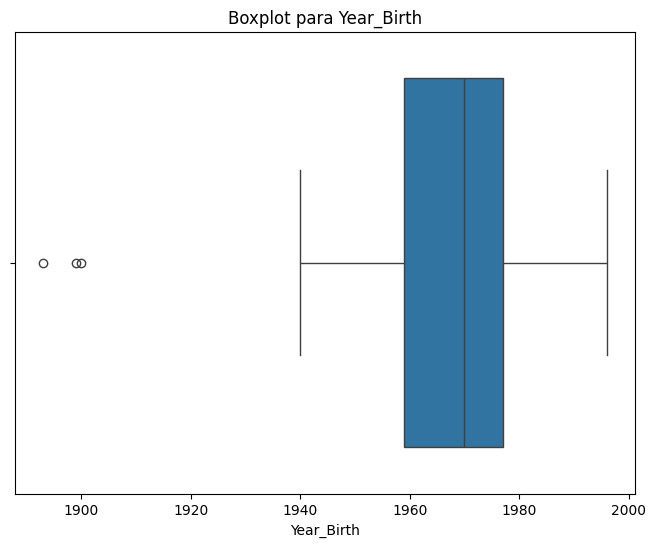

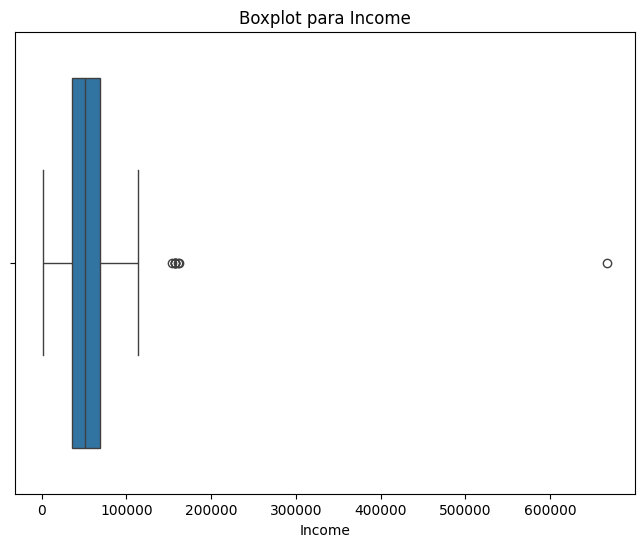

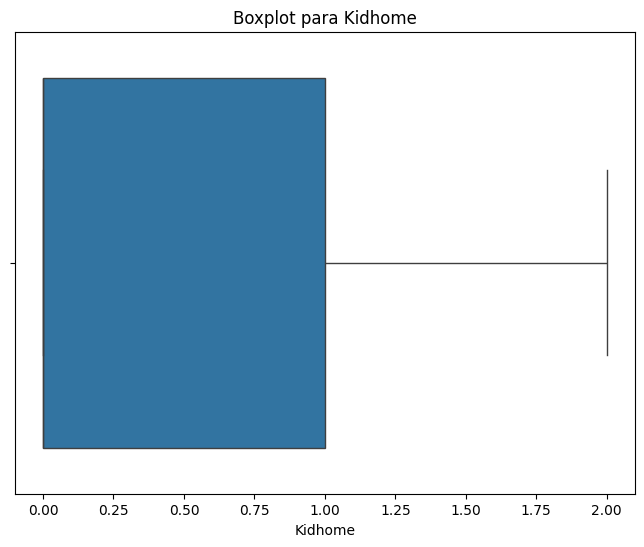

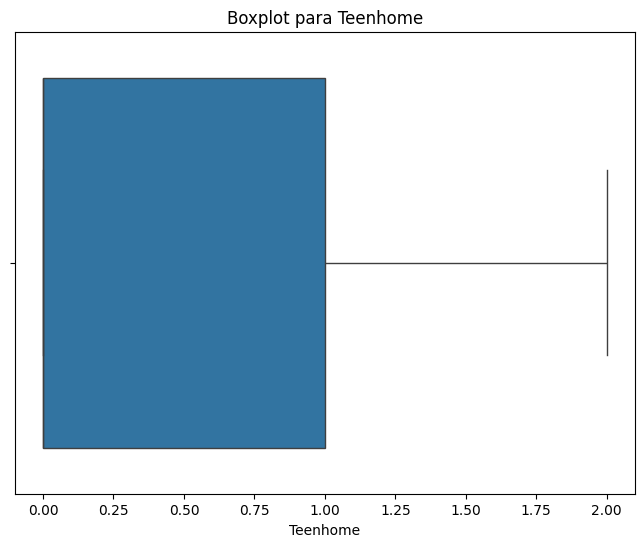

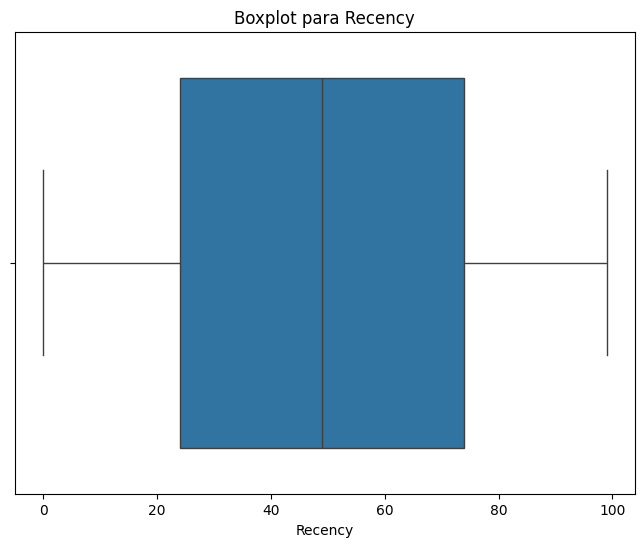

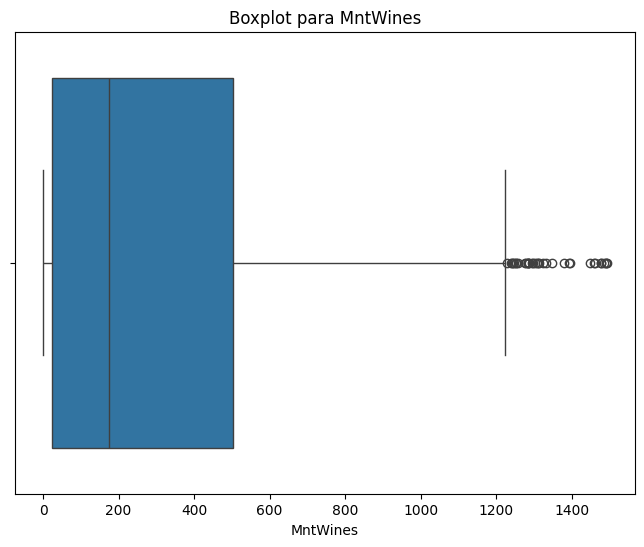

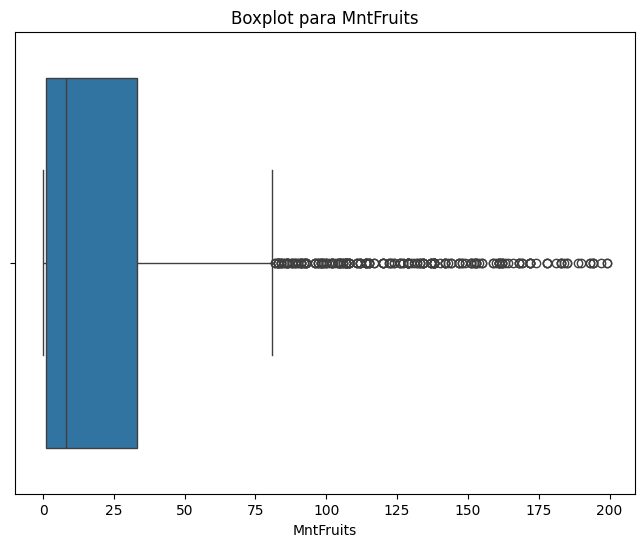

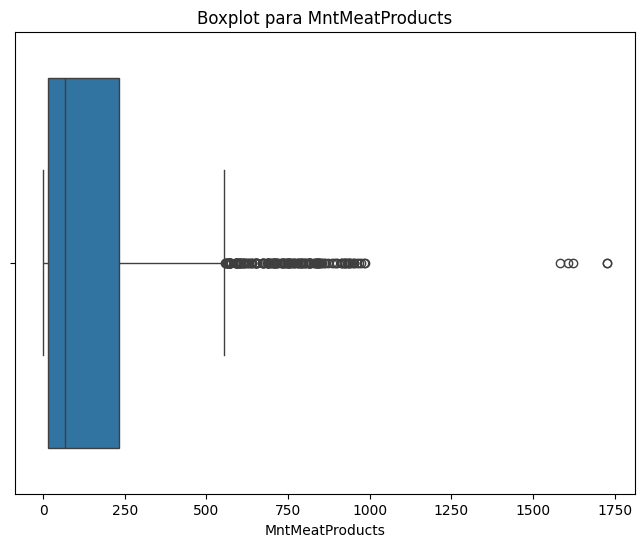

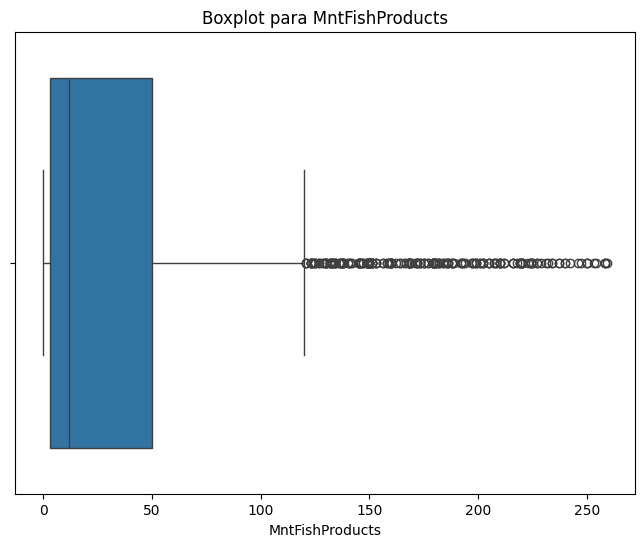

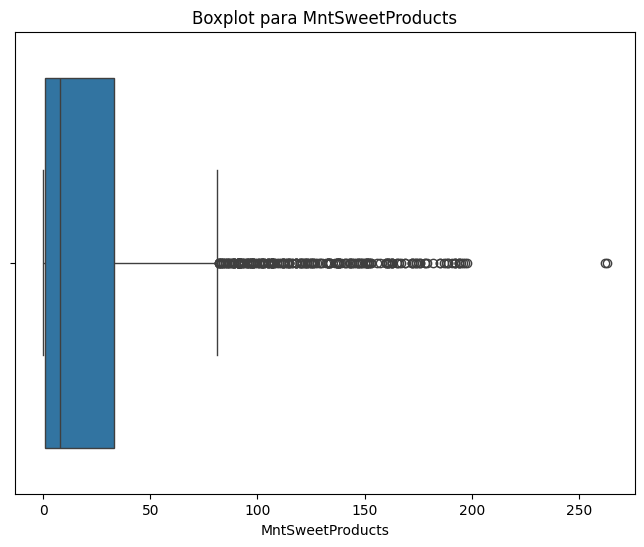

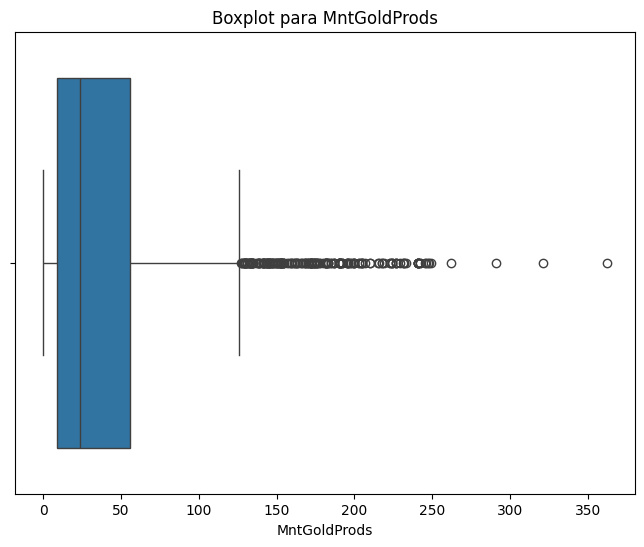

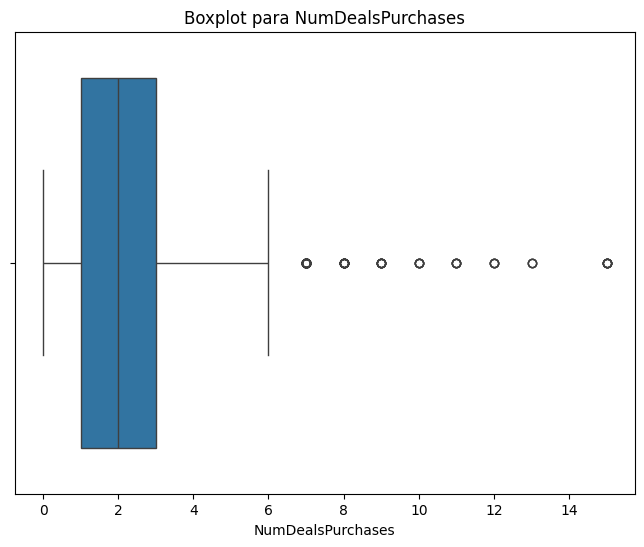

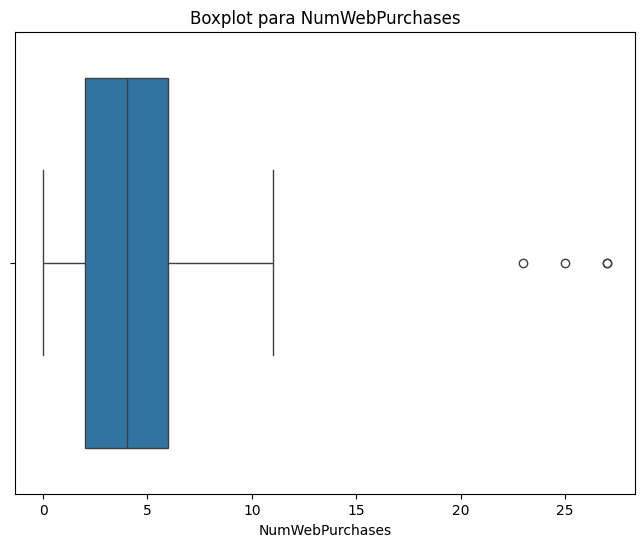

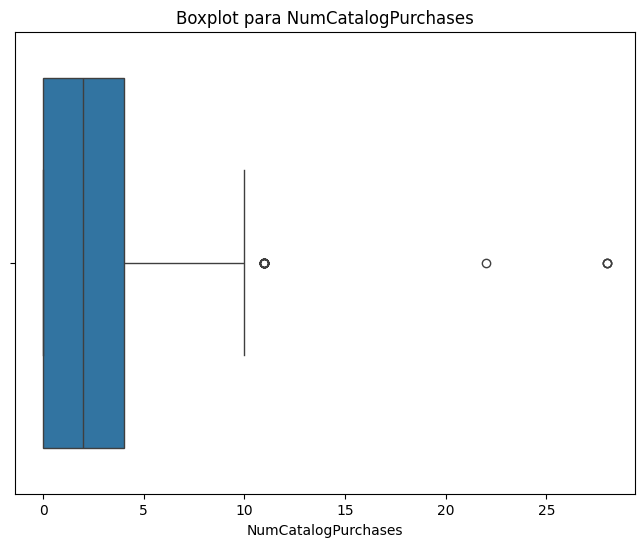

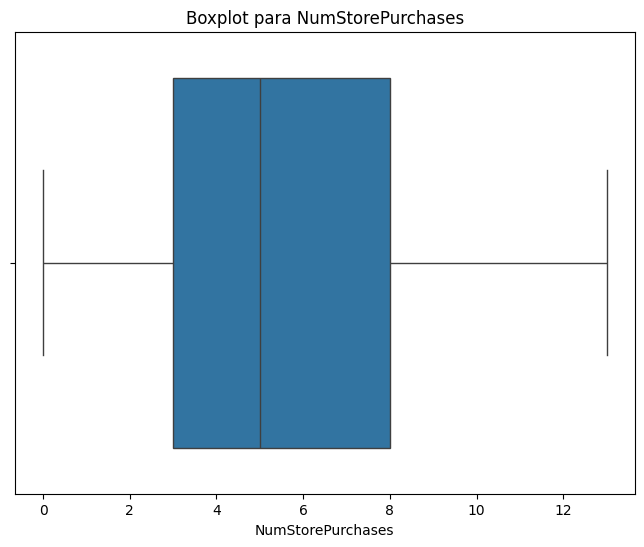

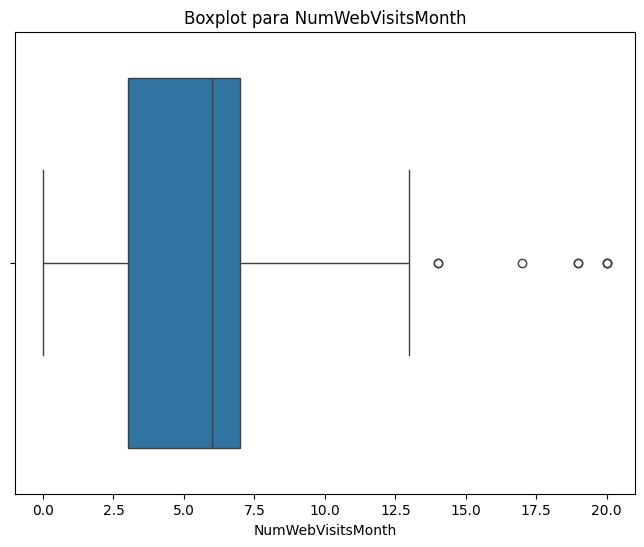

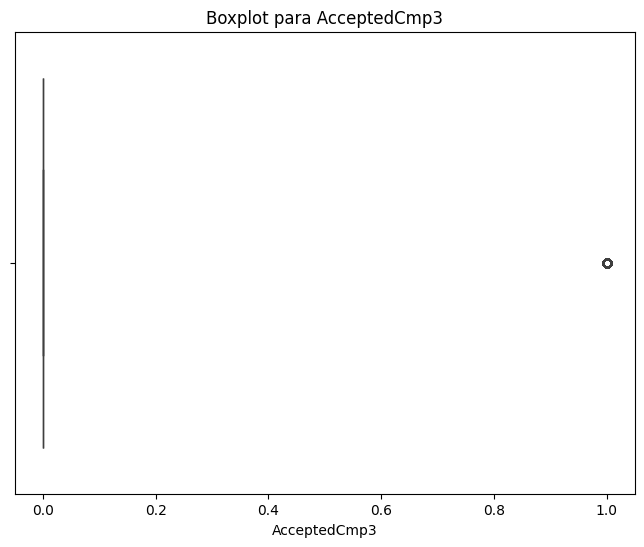

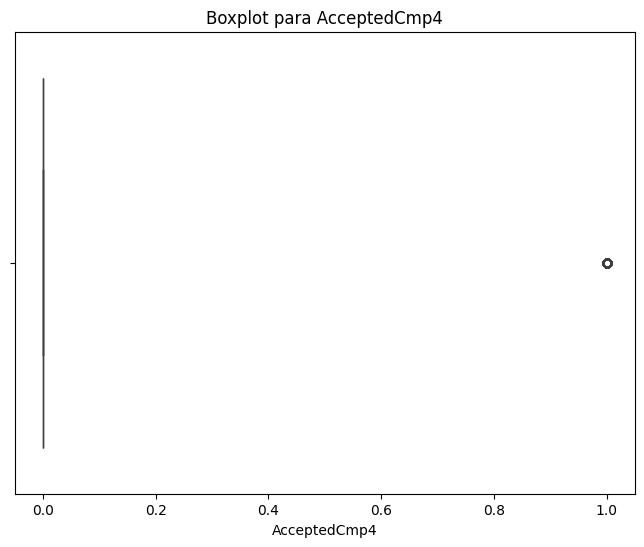

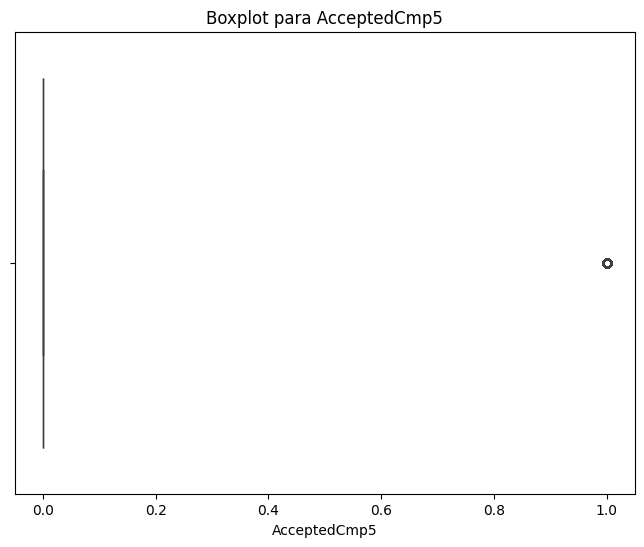

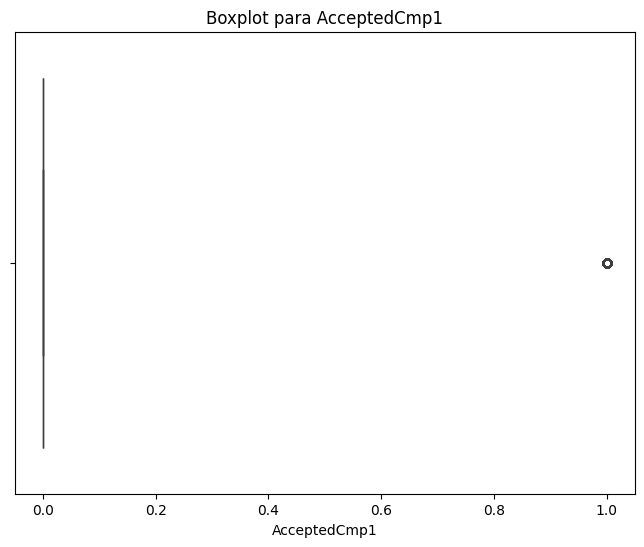

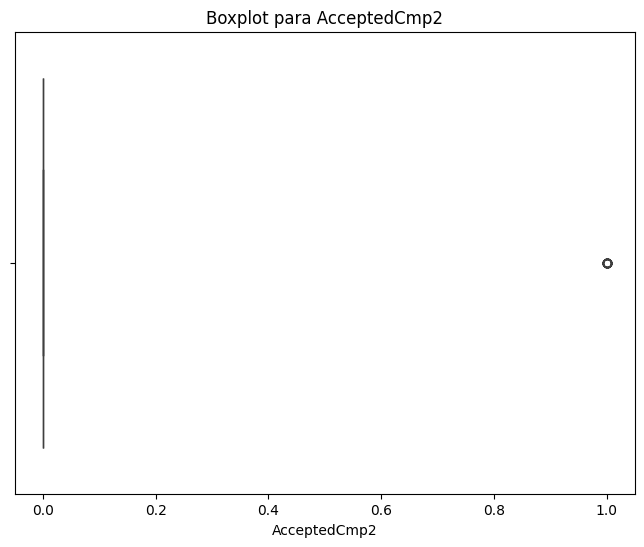

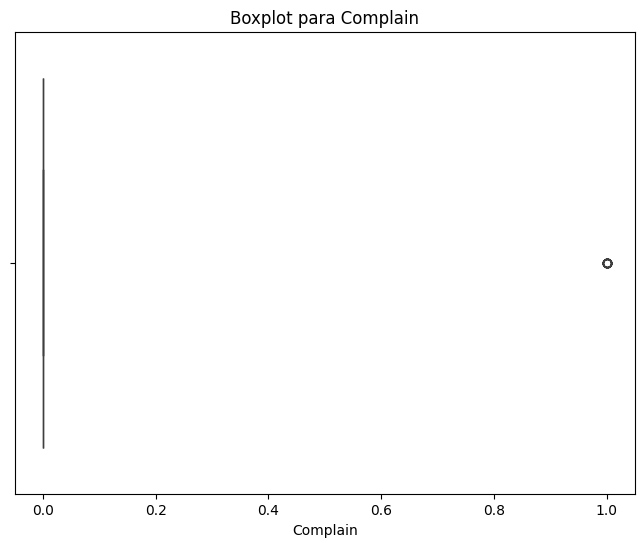

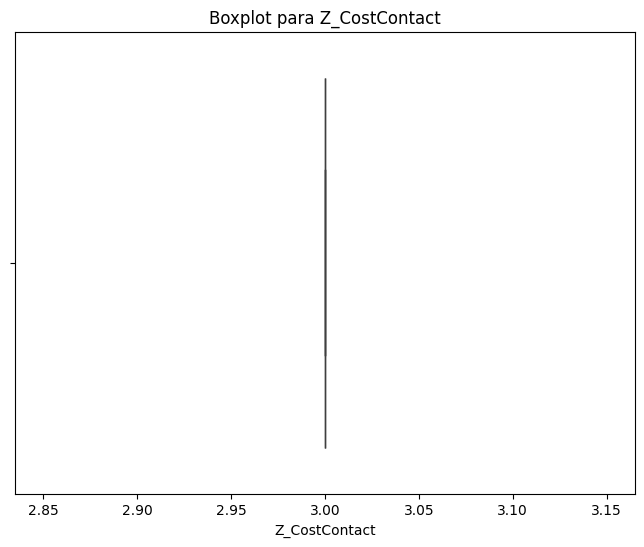

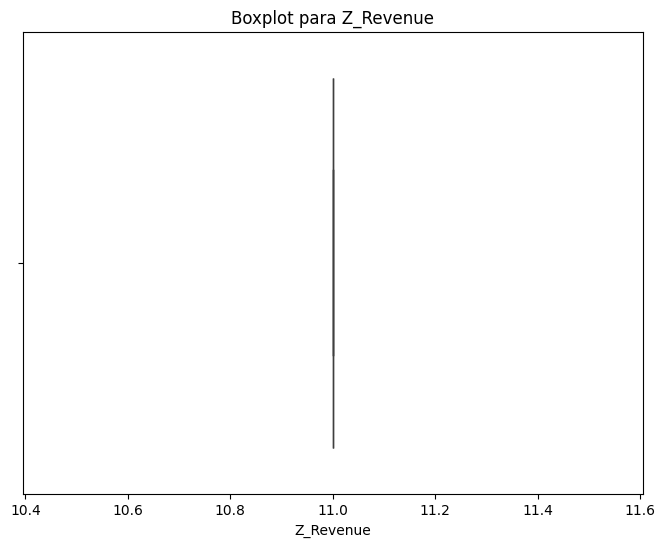

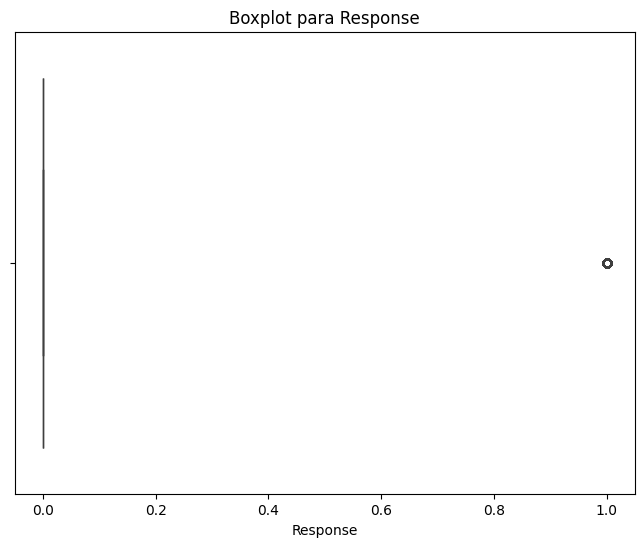

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot para {col}")
    plt.show()
#criando o boxplot

In [ ]:
import numpy as np

# Função para calcular os limites do IQR
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Função para limpar valores negativos nas colunas relevantes
def limpar_negativos(df, coluna):
    # Definir as colunas que não podem ter valores negativos
    colunas_sem_negativos = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                             'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']

    # Se a coluna estiver na lista, substituir valores negativos por NaN
    if coluna in colunas_sem_negativos:
        df[coluna] = df[coluna].apply(lambda x: max(x, 0))  # Substitui valores negativos por 0
    return df

# Função para ajustar limites de outliers
def ajustar_limites(limite_inferior, limite_superior, coluna):
    # Ajuste manual: se o limite inferior para colunas como 'Income' for negativo, colocar 0
    if limite_inferior < 0 and coluna in ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts']:
        limite_inferior = 0  # Ajuste para que o limite inferior não seja negativo

    return limite_inferior, limite_superior

# Lista de colunas a verificar
colunas = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
           'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']

# Iterar por cada coluna para detectar outliers e tratar valores negativos
for coluna in colunas:
    # Limpar valores negativos nas colunas que não podem ter
    df = limpar_negativos(df, coluna)

    # Detectar limites de outliers
    limite_inferior, limite_superior = detectar_outliers(df, coluna)

    # Ajustar limites, se necessário
    limite_inferior, limite_superior = ajustar_limites(limite_inferior, limite_superior, coluna)

    # Exibir os limites
    print(f"Limite Inferior para {coluna}: {limite_inferior}")
    print(f"Limite Superior para {coluna}: {limite_superior}")


Limite Inferior para Year_Birth: 1932.0
Limite Superior para Year_Birth: 2004.0
Limite Inferior para Income: 0
Limite Superior para Income: 118350.5
Limite Inferior para MntWines: 0
Limite Superior para MntWines: 1225.0
Limite Inferior para MntFruits: 0
Limite Superior para MntFruits: 81.0
Limite Inferior para MntMeatProducts: 0
Limite Superior para MntMeatProducts: 556.0
Limite Inferior para MntFishProducts: -67.5
Limite Superior para MntFishProducts: 120.5
Limite Inferior para MntSweetProducts: -47.0
Limite Superior para MntSweetProducts: 81.0
Limite Inferior para MntGoldProds: -61.5
Limite Superior para MntGoldProds: 126.5
Limite Inferior para NumDealsPurchases: -2.0
Limite Superior para NumDealsPurchases: 6.0
Limite Inferior para NumWebPurchases: -4.0
Limite Superior para NumWebPurchases: 12.0
Limite Inferior para NumWebVisitsMonth: -3.0
Limite Superior para NumWebVisitsMonth: 13.0


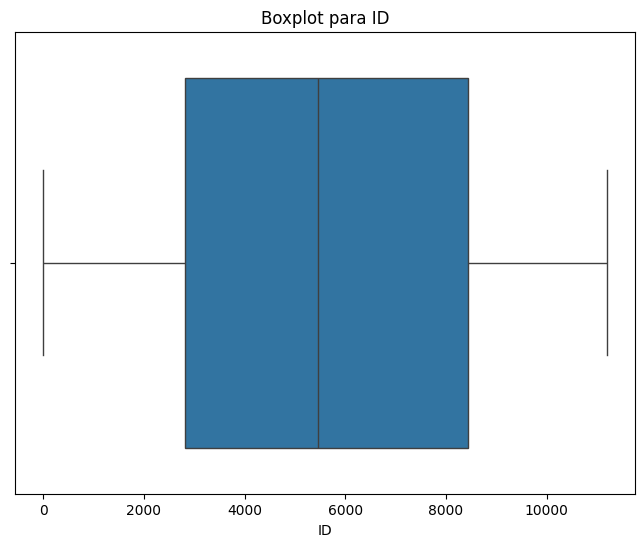

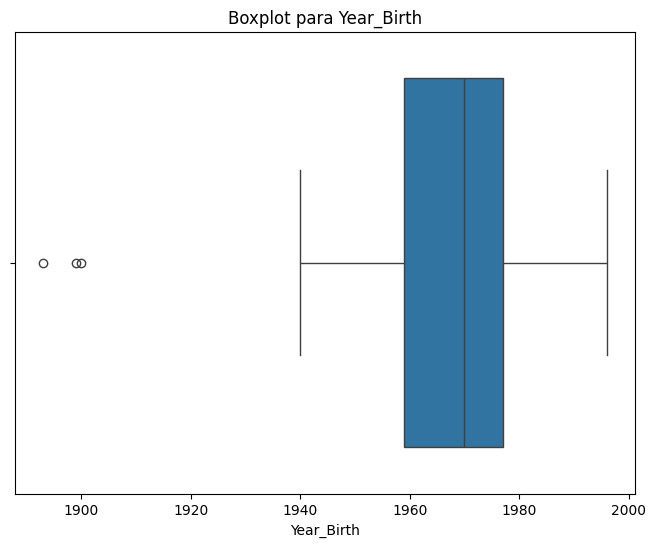

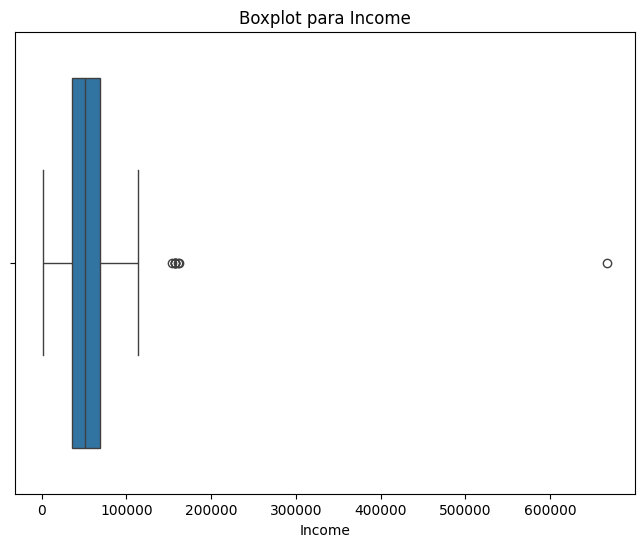

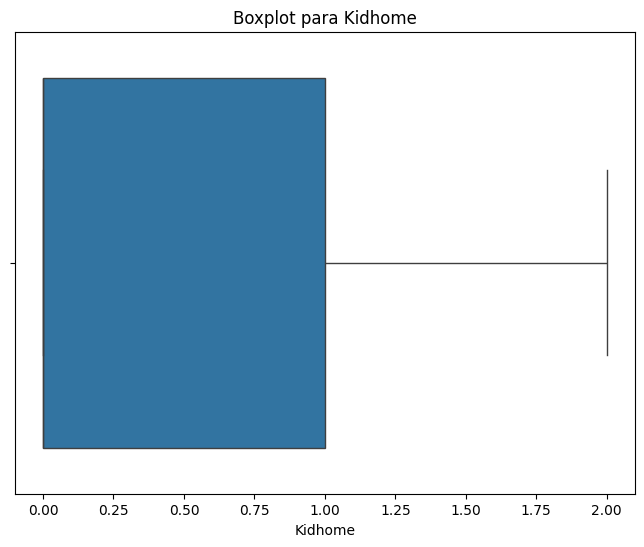

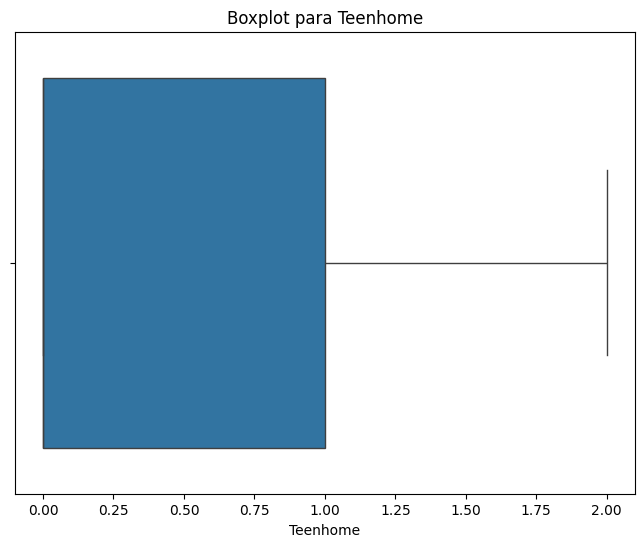

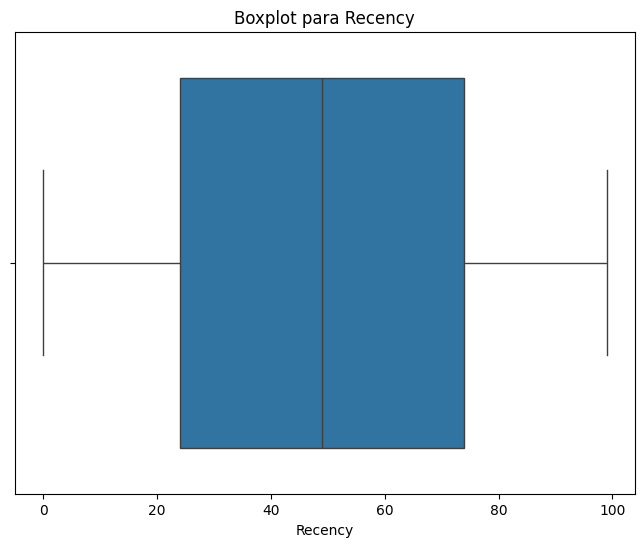

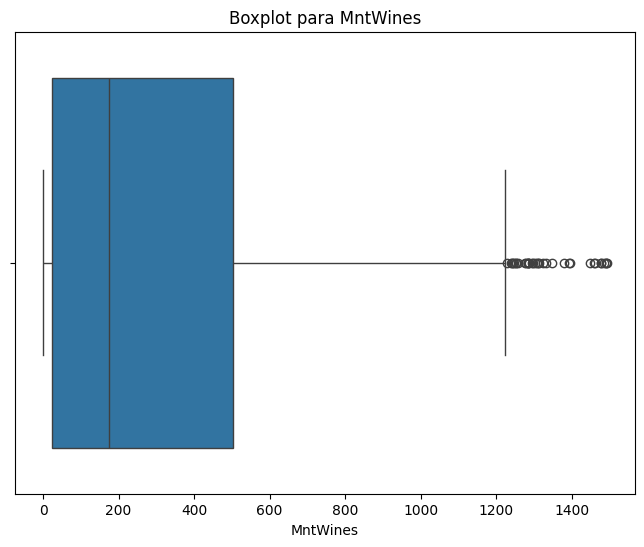

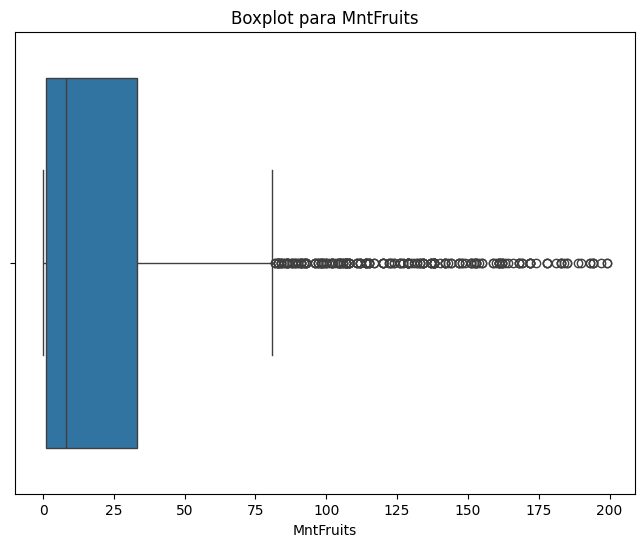

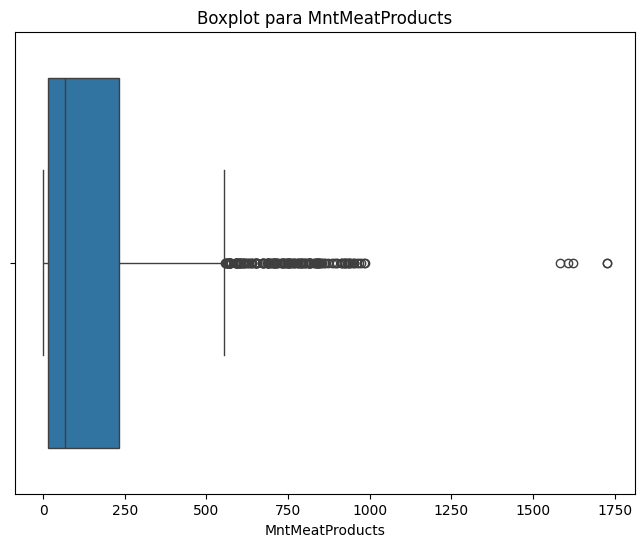

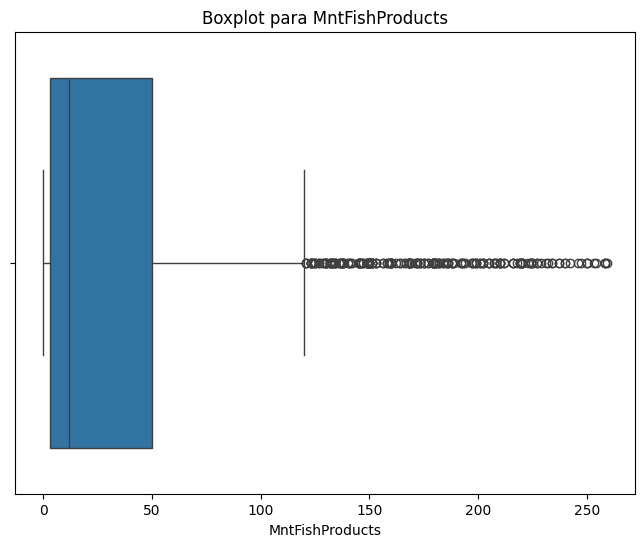

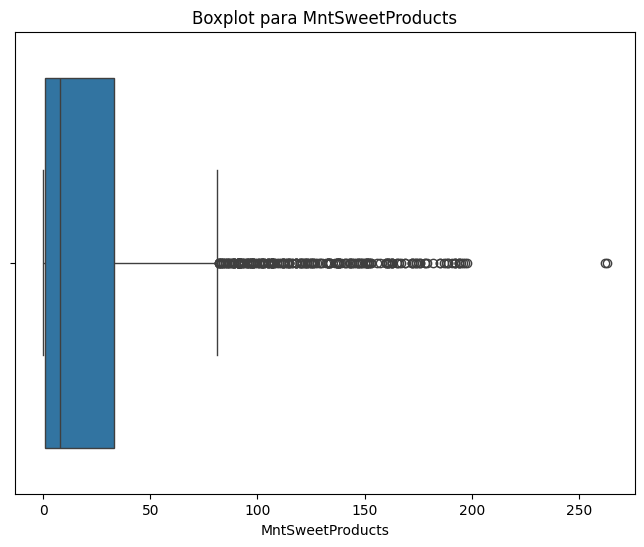

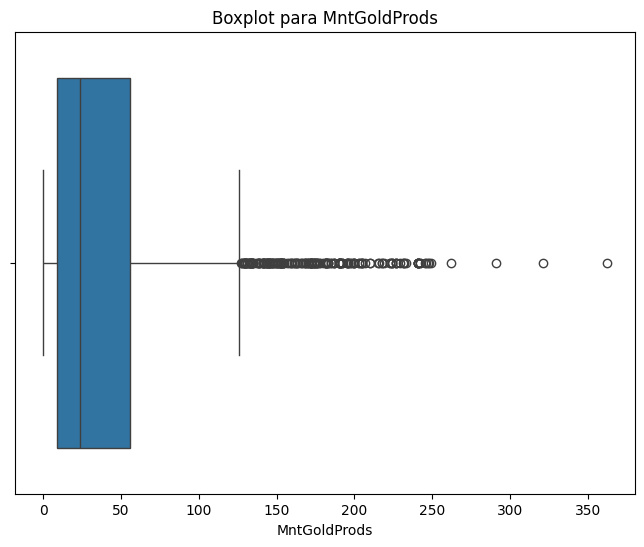

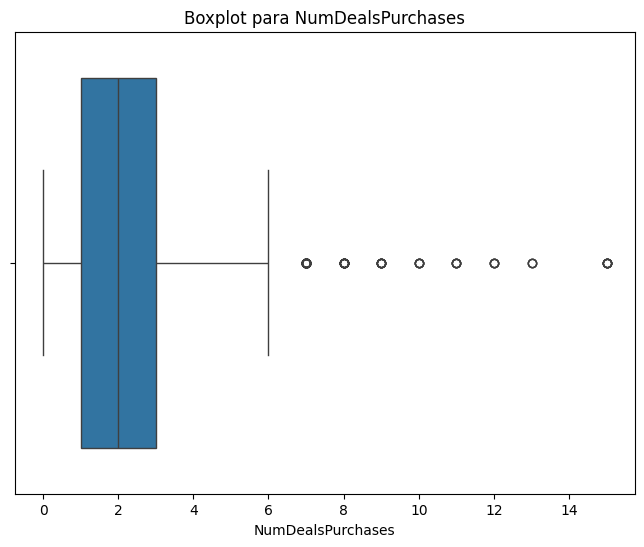

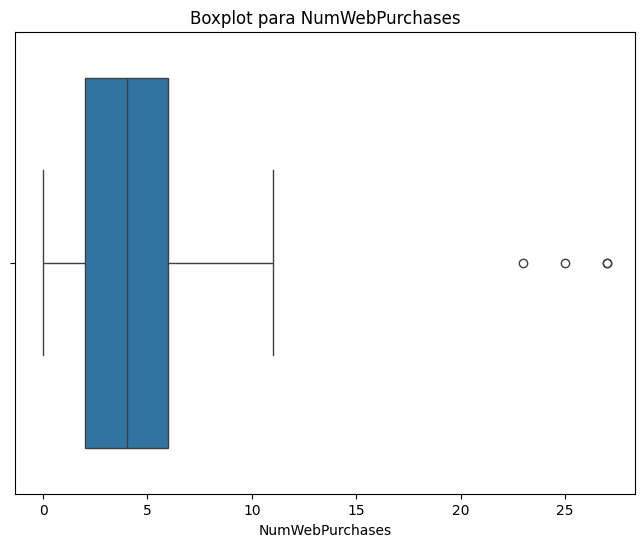

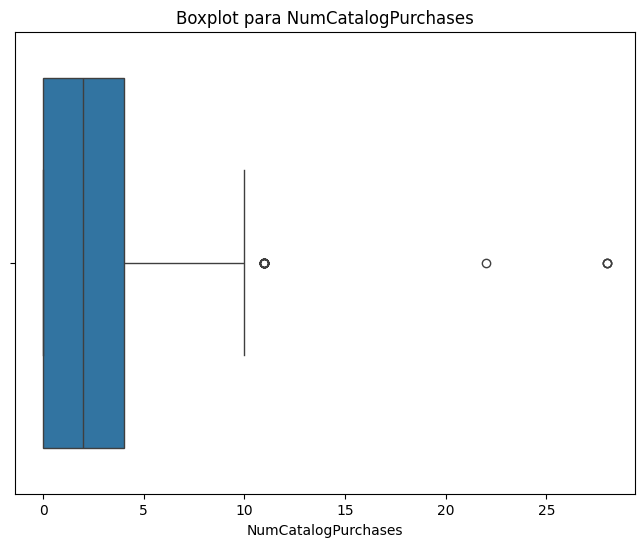

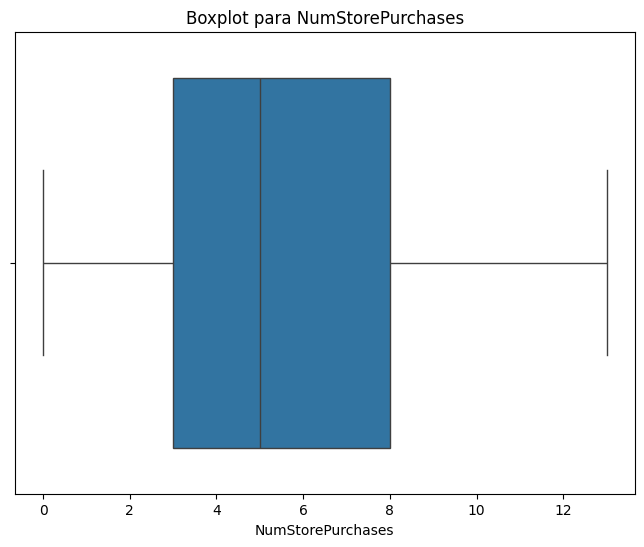

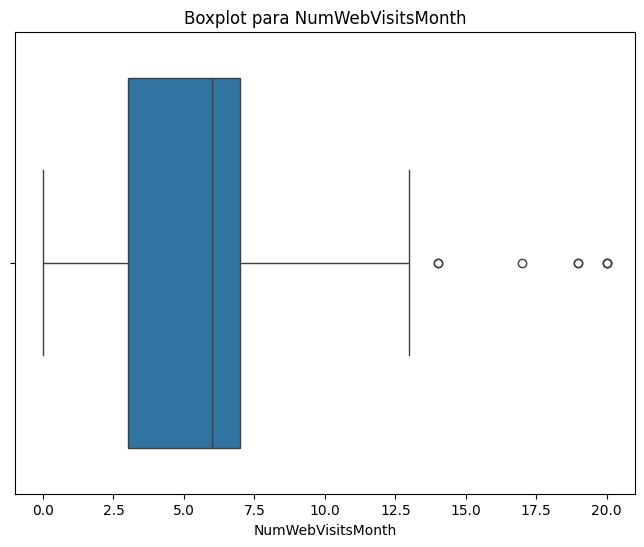

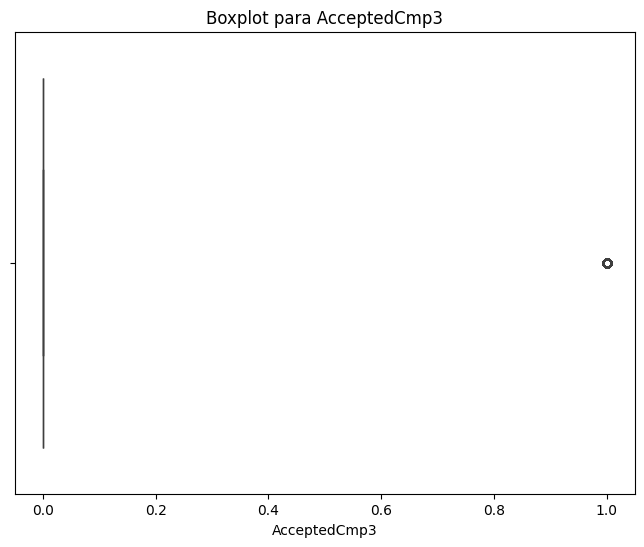

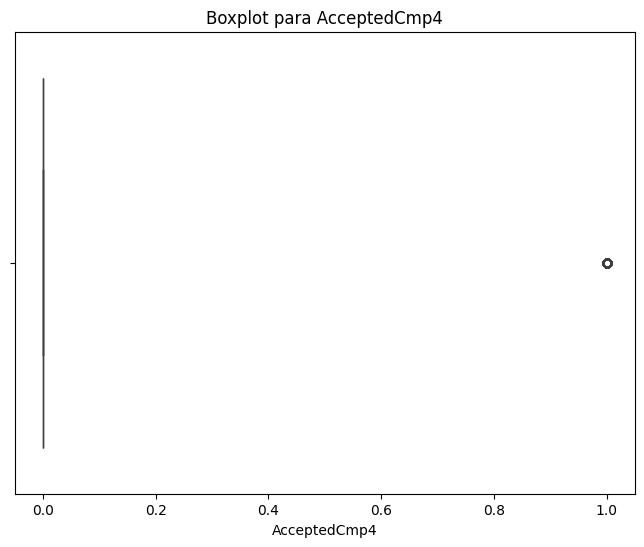

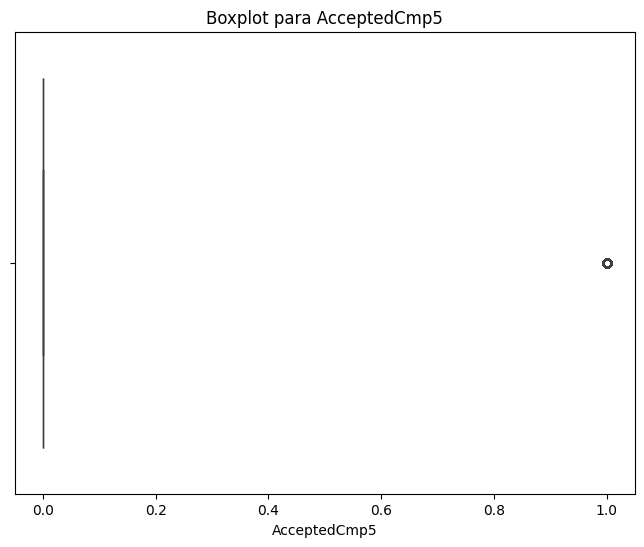

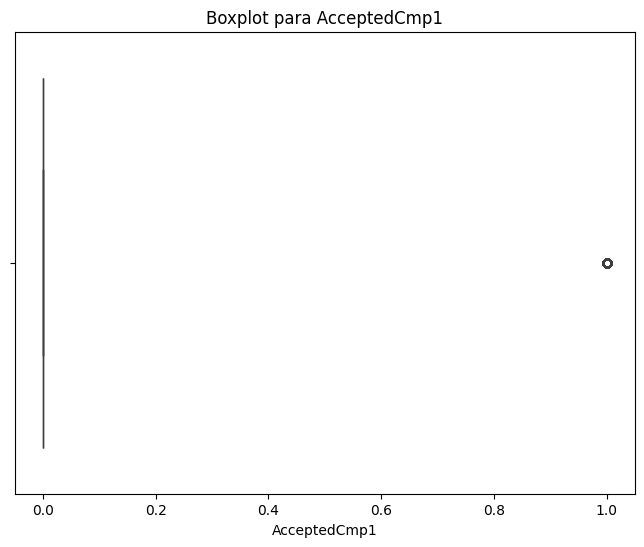

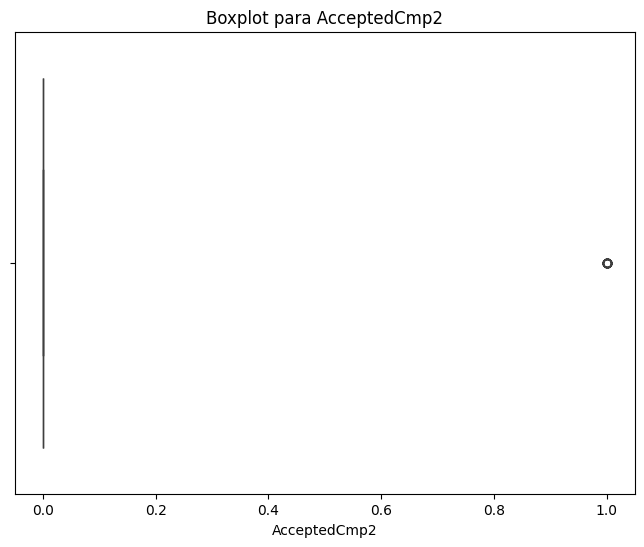

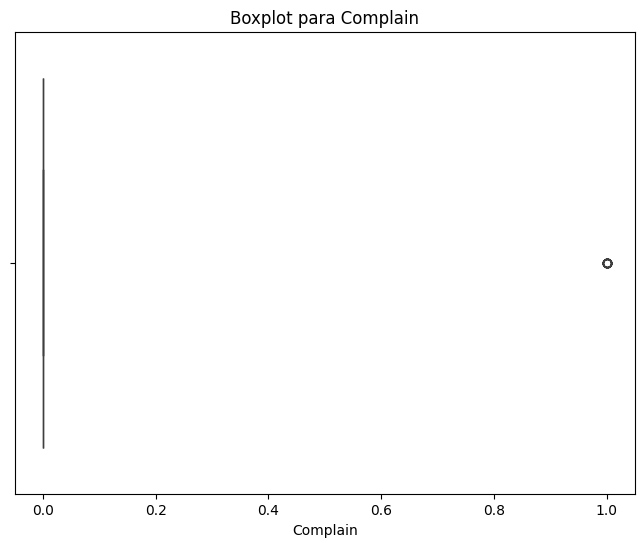

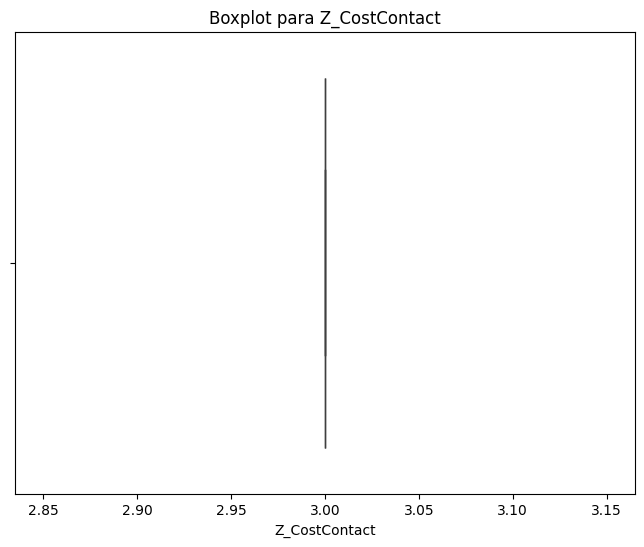

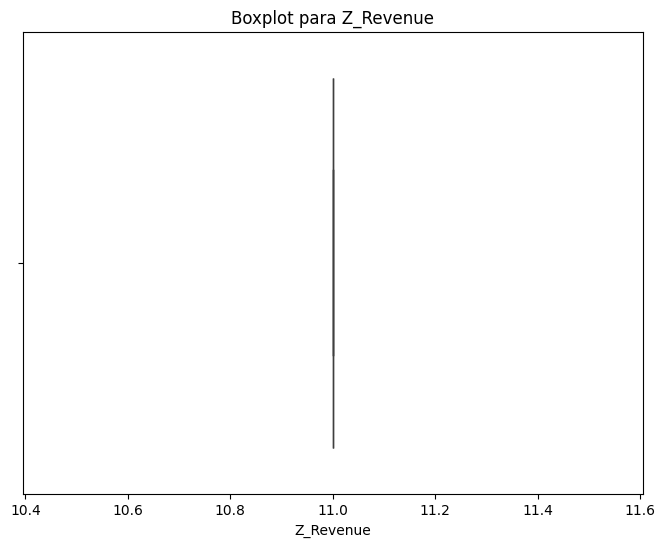

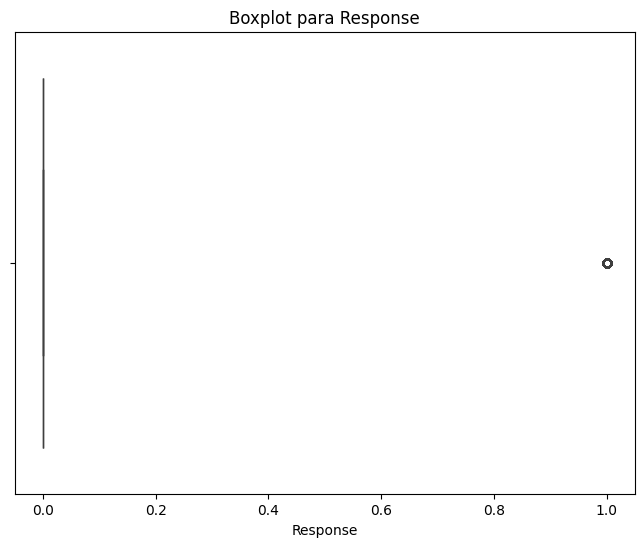

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot para {col}")
    plt.show()
#criando o boxplot

In [ ]:
fig = px.box(df, y="NumWebVisitsMonth", title="NumWebVisitsMonth")
fig.show()

In [ ]:
df = df[(df['Income'] >= 0) & (df['Income'] <= 118350.5)]
df = df[(df['NumDealsPurchases'] >= 0) & (df['NumDealsPurchases'] <= 6)]
df = df[(df['NumWebPurchases'] >= 0) & (df['NumWebPurchases'] <= 11)]
df = df[(df['NumWebVisitsMonth'] >= 0) & (df['NumWebVisitsMonth'] <= 11)]
#removendo os outliers acima do meu limite superior

In [ ]:
colunas = ['MntWines', 'MntFruits', 'MntMeatProducts',
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

medianas = {col: df[col].median() for col in colunas}

print(medianas)

#calculando a mediana das colunas caso nececite mudança

{'MntWines': 171.0, 'MntFruits': 8.0, 'MntMeatProducts': 66.0, 'MntFishProducts': 12.0, 'MntSweetProducts': 8.0, 'MntGoldProds': 24.0}


In [ ]:
#df['MntWines'] = np.where(df['MntWines'] > 1225.0, 177.5, df['MntWines'])
#df['MntFruits'] = np.where(df['MntFruits'] > 81.0, 8.0, df['MntFruits'])
#df['MntMeatProducts'] = np.where(df['MntMeatProducts'] > 555.0, 66.0, df['MntMeatProducts'])
#df['MntFishProducts'] = np.where(df['MntFishProducts'] > 120.0, 12.0, df['MntFishProducts'])
#df['MntSweetProducts'] = np.where(df['MntSweetProducts'] > 83.0, 8.0, df['MntSweetProducts'])
#df['MntGoldProds'] = np.where(df['MntGoldProds'] > 127.0, 25.0, df['MntGoldProds'])


In [ ]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


###Préprocessamento

In [ ]:
df['Dt_Customer']
#verificando as data de cadastros da coluna

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19
...,...
2234,2013-07-01
2235,2013-06-13
2237,2014-01-25
2238,2014-01-24


In [ ]:
print(df['Dt_Customer'].dtype)
#verificando o tipo de dados

object


In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y', errors='raise')
#convertendo a coluna 'Dt_Customer' para o tipo datetime

In [ ]:
print(df['Dt_Customer'].dtype)
#verificando o tipo de dados

datetime64[ns]


In [ ]:
df['Year_Customer'] = df['Dt_Customer'].dt.year
#exraindo o ano

In [ ]:
df['Year_Customer']

,Year_Customer
0,2012
1,2014
2,2013
3,2014
4,2014
...,...
2234,2013
2235,2013
2237,2014
2238,2014


In [ ]:
df['Month_Customer'] = df['Dt_Customer'].dt.month
df['Month_Customer']
#Separando mês

,Month_Customer
0,9
1,3
2,8
3,2
4,1
...,...
2234,7
2235,6
2237,1
2238,1


In [ ]:
df['Day_Customer'] = df['Dt_Customer'].dt.day
df['Day_Customer']
#Fazendo o mesmo procedimento com dia

,Day_Customer
0,4
1,8
2,21
3,10
4,19
...,...
2234,1
2235,13
2237,25
2238,24


In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Day_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,2012,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2014,8
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2014,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,0,0,0,0,0,3,11,0,2013,1
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,2013,13
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,2014,25
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,2014,24


In [ ]:
df['Age'] = 2025 - df['Year_Birth']
df['Age']
#criando uma coluna de idade

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2234,51
2235,58
2237,44
2238,69


In [ ]:
df.dtypes
#verificando o tipo dos dados

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntWines,int64


In [ ]:
df.isnull().values.any()
#vendo se existe algum valor nulo no df

np.False_

Resumo do pré-processamento



---
















Analise de dados

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Day_Customer,Month_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2012,4,9
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2014,8,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2013,21,8
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2014,10,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,0,0,0,0,3,11,0,2013,1,7
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,2013,13,6
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,2014,25,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,2014,24,1


###Análise de Dados

* Análise variaveis categorigas

In [ ]:
ed = df['Education'].value_counts()
fig = px.pie(values=ed, names=ed.index,
             title='Distribuição de Nível de Educação',
             labels=ed.index)
fig.show()
#contando os valores da coluna 'Education', criando gráfico de pizza

A análise da variável Education revela que a maior parte dos clientes possui nível de graduação, representando 50,3% do total de clientes (ou 1.127 clientes).

Além disso, a distribuição é a seguinte:

* 2,41% dos clientes têm apenas ensino médio (totalizando 54 clientes).

* 21,7% dos clientes possuem PhD (totalizando 488 clientes).

* 16,5% têm Mestrado (totalizando 370 clientes).

* 9,06% são clientes com pós-graduação (totalizando 203 clientes).

Essa distribuição mostra que, a maior parte da base de clientes está concentrada em níveis educacionais superiores (graduação, PhD, Mestrado e Pós-graduação), com uma minoria de clientes com ensino médio.

In [ ]:
ed = df['Kidhome'].value_counts()
fig = px.pie(values=ed, names=ed.index,
             title='Quantidade de crianças em casa',
             labels=ed.index)
fig.show()
#verificando quantidade de crianças pertecentes aos clientes



*   A maioria não tem criança em casa totalizando 59,2%...Apenas 1,89% tem a soma de 2 filhos, os demais, 38,9% tem 1 filho em casa.



In [ ]:
fig = px.histogram(df, x="Marital_Status", title="Distribuição do Estado Civil dos Clientes",
                   labels={'Marital_Status': 'Estado Civil'}, color="Marital_Status", text_auto=True)

fig.show()
#demosrando a contagem do esado civil dos clientes no df

A distribuição do estado civil dos clientes revela que 864 estão casados, 580 estão em união estável e 480 são solteiros. Essas três categorias representam as maiores proporções, enquanto outras categorias como 'Outros' (que inclui 'YOLO', 'Alone' e 'Absurd') são bem menores."

In [ ]:
ed = df['Teenhome'].value_counts()
fig = px.pie(values=ed, names=ed.index,
             title='número de adolescentes morando na casa do cliente',
             labels=ed.index)
fig.show()
#verificando número de adolecentes



---



In [ ]:
fig = px.bar(df.groupby('Education', as_index=False)['Income'].mean(), x='Education', y='Income',
             title='Média de Renda por Nível de Educação')
fig.show()
#media deeducação e renda



*   Clientes Phd, graduados e mestres tem diferenças sutis referente a renda, ainda que os Phds tenham melhor alcance.


* Variaveis númericas

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df_numerico = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = df_numerico.corr().round(2)

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    aspect="auto",
    color_continuous_scale="Magma",
    title="Mapa de Correlação"
)

fig.update_layout(
    width=800,
    height=800,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()


In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    "Income vs MntWines",
    "Income vs MntFruits",
    "Income vs MntMeatProducts",
    "Income vs MntFishProducts"
))

fig.add_trace(go.Scatter(x=df['Income'], y=df['MntWines'], mode='markers', name='Wines'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df['Income'], y=df['MntFruits'], mode='markers', name='Fruits'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df['Income'], y=df['MntMeatProducts'], mode='markers', name='Meat'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df['Income'], y=df['MntFishProducts'], mode='markers', name='Fish'),
              row=2, col=2)

fig.update_layout(height=700, width=1000, title_text="Relação entre Renda e Consumo por Categoria")
fig.show()
#verificando se há correlação visual entre renda e tipo de consumo.

In [ ]:
fig = px.histogram(
    df,
    x='Age',
    nbins=30,  # Número de barras no histograma
    title="Distribuição de Idade dos Clientes"
)

fig.update_layout(
    xaxis_title='Idade',
    yaxis_title='Número de Clientes',
    template='plotly_white'
)

fig.show()
# Criando o gráfico de histograma com linha de densidade

###Feature Engineering

Criando extra features

* Total_Spent:
Somar todos os gastos em diferentes categorias (vinhos, frutas, carnes, etc.)
* Relation (Estado civil codificado numericamente)
* Children (Soma de crianças e adolescentes em casa)
* Family_Size (Soma de relação + crianças)


In [ ]:
df["Total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [ ]:
df["Relation"] = df["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1})
df["Children"] = df["Kidhome"]+ df["Teenhome"]
df["Family_Size"] = df["Relation"]+ df["Children"]

/tmp/ipython-input-101-1813905464.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df= df.drop(['Relation','Children'],axis=1)
#retirando relation e children

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year_Customer', 'Day_Customer', 'Month_Customer', 'Age', 'Total_Spent',
       'Family_Size'],
      dtype='object')

Codificação por rótulos para dados categóricos, por exemplo, dados de Educação

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df['Education']

,Education
0,Graduation
1,Graduation
2,Graduation
3,Graduation
4,PhD
...,...
2234,Graduation
2235,Graduation
2237,Graduation
2238,Master


In [ ]:
lb = LabelEncoder()
df['Education']= lb.fit_transform(df['Education'])
#transformando a coluna education

In [ ]:
df['Response']

,Response
0,1
1,0
2,0
3,0
4,0
...,...
2234,0
2235,0
2237,0
2238,0


Escalonamento dos dados

In [ ]:
df1 = df.copy()
to_drop = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1","AcceptedCmp2", "Complain", "Response", ]
df1 = df1.drop(to_drop, axis=1)
#Criando cópia do df e apagando determinadas colunas

In [ ]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Year_Customer,Day_Customer,Month_Customer,Age,Total_Spent,Family_Size
0,5524,1957,2,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,3,11,2012,4,9,68,1617,1
1,2174,1954,2,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,3,11,2014,8,3,71,27,3
2,4141,1965,2,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,3,11,2013,21,8,60,776,2
3,6182,1984,2,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,3,11,2014,10,2,41,53,3
4,5324,1981,4,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,3,11,2014,19,1,44,422,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,2,Married,34421.0,1,0,2013-07-01,81,3,...,2,7,3,11,2013,1,7,51,30,3
2235,10870,1967,2,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,3,11,2013,13,6,58,1341,3
2237,7270,1981,2,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,3,11,2014,25,1,44,1241,1
2238,8235,1956,3,Together,69245.0,0,1,2014-01-24,8,428,...,10,3,3,11,2014,24,1,69,843,3


In [ ]:
scaler = StandardScaler()
#padronizando os dados númericos

In [ ]:
df['Response']

,Response
0,1
1,0
2,0
3,0
4,0
...,...
2234,0
2235,0
2237,0
2238,0


###Aprendizado Não Supervisionado

####Performance do modelo

Usando o metodo Elbow para encontrar o número ideal de clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
#importando bibliotecas

In [ ]:
df= df.drop(['Marital_Status','Dt_Customer'],axis=1)
#retirando variaveis irrelevantes no momento

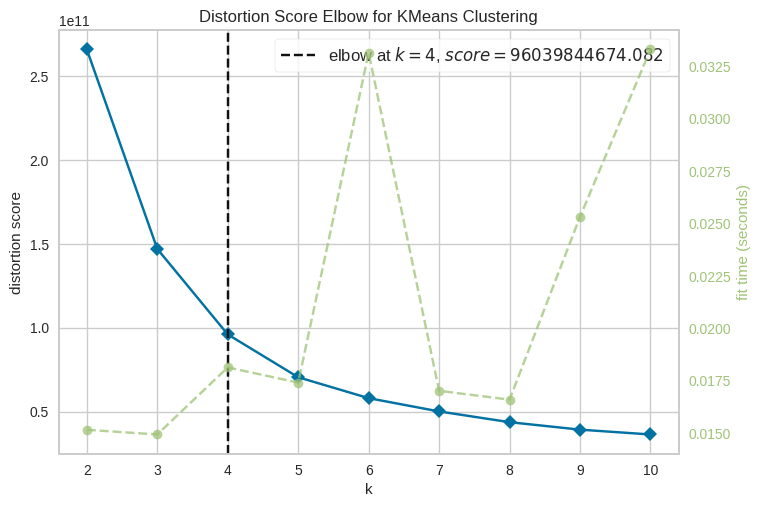

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
em = KElbowVisualizer(KMeans(), k=10)
em.fit(df)
em.show()
#identificando melhor numero de clusters

* O número ideal de clusters é k=4

# K-means

In [ ]:
from sklearn.cluster import KMeans
#importando biblioteca

In [ ]:
kmc = KMeans(n_clusters=4)
pred = kmc.fit_predict(df)
df["Clusters"] = pred
#Ajustando o modelo e prevendo o clusters

In [ ]:
df['Clusters']

,Clusters
0,3
1,0
2,1
3,2
4,3
...,...
2234,0
2235,3
2237,3
2238,3


Visualizando os clusters

/tmp/ipython-input-120-3159537817.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




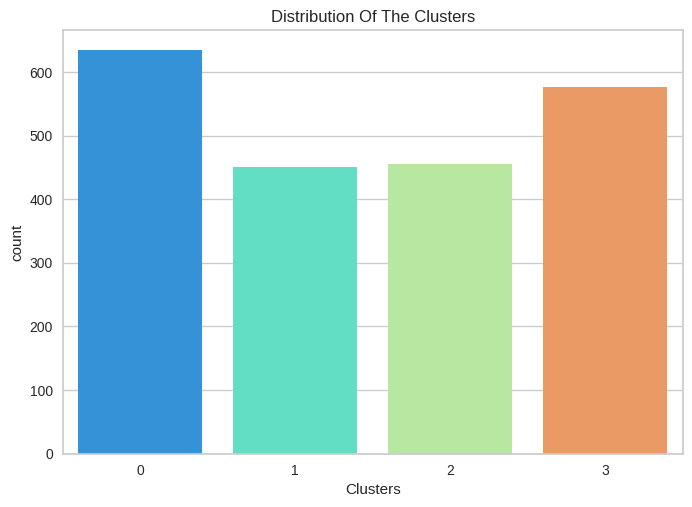

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
fig = sns.countplot(x=df["Clusters"], palette="rainbow")
fig.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
fig = px.histogram(
    df,
    x="Clusters",
    color="Clusters",
    color_discrete_sequence=["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"],
    title="Distribuição dos Clusters"
)

fig.update_layout(
    xaxis_title="Clusters",
    yaxis_title="Quantidade de Clientes",
    bargap=0.2
)

fig.show()

A diferença entre o menor (445) e o maior (634) cluster é boa e mostra que o k-means padrões distintos decomportamento.

In [ ]:
fig = px.scatter(
    df,
    x="Total_Spent",
    y="Income",
    color="Clusters",
    title="Perfil dos Clusters com Base na Renda e Gasto Total",
    color_continuous_scale="Rainbow" if df["Clusters"].dtype != 'object' else None,  # Só aplica escala se for numérica
    template="plotly_white"
)

fig.show()

Ótima distribuição, de 0 a 30,30 a 50, 50 a 70, 70 a 100,indicando que a clusterização capturou nuances claras de comportamento por faixa de renda.


* Cluster 1 (0 a 30 mil): Possivelmente representa clientes com baixo poder aquisitivo, menor gasto total, talvez mais sensíveis a promoções e campanhas com preços acessíveis.

* Cluster 2 (30 a 50 mil): Classe média baixa a média, comportamento mais equilibrado entre consumo e renda.

* Cluster 3 (50 a 70 mil): Classe média sólida, provavelmente com bom engajamento e consumo consistente.

* Cluster 4 (70 a 100+ mil): Alta renda, provavelmente o grupo com maior ticket médio, fidelidade e propensão a produtos premium (como vinhos e produtos de ouro).

## Aprendizado Supervisionado

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#bibliotecas

In [ ]:
y = df['Clusters']
X = df.drop(['Clusters'], axis=1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=51
)
#transformando cluster em alvo e o adicionando a variavel y (meta)
#variavel x - features

In [ ]:
model = RandomForestClassifier(random_state=51)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Acurácia na previsão de clusters:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia na previsão de clusters: 0.9976415094339622
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       139
           1       1.00      1.00      1.00        81
           2       1.00      0.99      0.99        95
           3       1.00      1.00      1.00       109

    accuracy                           1.00       424
   macro avg       1.00      1.00      1.00       424
weighted avg       1.00      1.00      1.00       424



In [ ]:
import plotly.figure_factory as ff
#biblioteca interativa
cm = confusion_matrix(y_test, y_pred)
fig = ff.create_annotated_heatmap(
    z=cm,
    x=[f'Pred {i}' for i in range(len(cm))],
    y=[f'True {i}' for i in range(len(cm))],
    colorscale='Blues'
)
fig.update_layout(title="Matriz de Confusão")
fig.show()

In [ ]:
!pip install joblib
#instalando joblib

In [ ]:
import joblib
joblib.dump(model, 'modelo_clusters_rf.pkl')
#  importando biblioteca e salvando o modelo treinado

['modelo_clusters_rf.pkl']

# Resumo
O modelo de classificação apresentou uma performance excelente na tarefa de previsão dos clusters de clientes. Com acurácia geral de 100%, o modelo foi capaz de identificar corretamente os grupos de clientes com base em suas características.

As métricas de precision, recall e f1-score se mantiveram em 1.00 (ou muito próximas) em todas as classes, o que indica que o modelo não apenas acerta bem, mas também evita erros tanto de falsos positivos quanto de falsos negativos. Isso é especialmente importante, onde decisões baseadas em classificações erradas podem gerar prejuízos ou oportunidades perdidas.

Com esse desempenho, o modelo se mostra altamente confiável para classificar novos clientes em seus respectivos clusters, permitindo ações segmentadas e eficazes.

In [ ]:
cluster_profiles = df.groupby("Clusters")[[
    'Income', 'Total_Spent', 'Recency', 'NumWebPurchases',
    'NumStorePurchases', 'Response'
]].mean().round(2)

cluster_profiles.reset_index(inplace=True)
cluster_profiles
# Agrupar os dados por cluster e calcular as médias
# Exibir o resultado

,Clusters,Income,Total_Spent,Recency,NumWebPurchases,NumStorePurchases,Response
0,0,42088.94,211.88,49.57,3.17,4.04,0.12
1,1,80173.21,1412.26,49.49,5.30,8.39,0.30
2,2,24018.62,70.03,48.38,1.90,2.98,0.11
3,3,62033.20,828.26,48.72,5.54,7.94,0.10


In [ ]:
cluster_names = {
    0: "Média Renda - Baixo Gasto",
    1: "Alta Renda - Alto Gasto",
    2: "Baixa Renda - Baixo Gasto",
    3: "Média Renda - Médio Gasto"
}

df['Cluster_Nome'] = df['Clusters'].map(cluster_names)
#mapeando

In [ ]:
print(df[['Clusters', 'Cluster_Nome']].head(10))

    Clusters               Cluster_Nome
0          3  Média Renda - Médio Gasto
1          0  Média Renda - Baixo Gasto
2          1    Alta Renda - Alto Gasto
3          2  Baixa Renda - Baixo Gasto
4          3  Média Renda - Médio Gasto
5          3  Média Renda - Médio Gasto
6          3  Média Renda - Médio Gasto
7          0  Média Renda - Baixo Gasto
8          2  Baixa Renda - Baixo Gasto
11         2  Baixa Renda - Baixo Gasto


In [ ]:
le = LabelEncoder()
le.fit(df['Cluster_Nome'].unique())
y_pred_names = le.inverse_transform(y_pred)

print(y_pred_names)
# Agora as previsões estão com nomes ao invés de números
# Criando o encoder e "ensinando" os nomes dos clusters

['Baixa Renda - Baixo Gasto' 'Média Renda - Baixo Gasto'
 'Média Renda - Baixo Gasto' 'Alta Renda - Alto Gasto'
 'Alta Renda - Alto Gasto' 'Baixa Renda - Baixo Gasto'
 'Média Renda - Baixo Gasto' 'Média Renda - Baixo Gasto'
 'Baixa Renda - Baixo Gasto' 'Alta Renda - Alto Gasto'
 'Alta Renda - Alto Gasto' 'Média Renda - Baixo Gasto'
 'Alta Renda - Alto Gasto' 'Baixa Renda - Baixo Gasto'
 'Baixa Renda - Baixo Gasto' 'Média Renda - Baixo Gasto'
 'Baixa Renda - Baixo Gasto' 'Alta Renda - Alto Gasto'
 'Média Renda - Médio Gasto' 'Alta Renda - Alto Gasto'
 'Alta Renda - Alto Gasto' 'Alta Renda - Alto Gasto'
 'Alta Renda - Alto Gasto' 'Média Renda - Médio Gasto'
 'Média Renda - Baixo Gasto' 'Alta Renda - Alto Gasto'
 'Alta Renda - Alto Gasto' 'Média Renda - Baixo Gasto'
 'Média Renda - Baixo Gasto' 'Média Renda - Médio Gasto'
 'Alta Renda - Alto Gasto' 'Média Renda - Baixo Gasto'
 'Média Renda - Baixo Gasto' 'Média Renda - Médio Gasto'
 'Média Renda - Baixo Gasto' 'Alta Renda - Alto Gasto'
 '

In [ ]:
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Year_Customer,Day_Customer,Month_Customer,Age,Total_Spent,Family_Size,Clusters,Cluster_Nome
0,5524,1957,2,58138.0,0,0,58,635,88,546,...,11,1,2012,4,9,68,1617,1,3,Média Renda - Médio Gasto
1,2174,1954,2,46344.0,1,1,38,11,1,6,...,11,0,2014,8,3,71,27,3,0,Média Renda - Baixo Gasto
2,4141,1965,2,71613.0,0,0,26,426,49,127,...,11,0,2013,21,8,60,776,2,1,Alta Renda - Alto Gasto
3,6182,1984,2,26646.0,1,0,26,11,4,20,...,11,0,2014,10,2,41,53,3,2,Baixa Renda - Baixo Gasto
4,5324,1981,4,58293.0,1,0,94,173,43,118,...,11,0,2014,19,1,44,422,3,3,Média Renda - Médio Gasto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,2,34421.0,1,0,81,3,3,7,...,11,0,2013,1,7,51,30,3,0,Média Renda - Baixo Gasto
2235,10870,1967,2,61223.0,0,1,46,709,43,182,...,11,0,2013,13,6,58,1341,3,3,Média Renda - Médio Gasto
2237,7270,1981,2,56981.0,0,0,91,908,48,217,...,11,0,2014,25,1,44,1241,1,3,Média Renda - Médio Gasto
2238,8235,1956,3,69245.0,0,1,8,428,30,214,...,11,0,2014,24,1,69,843,3,3,Média Renda - Médio Gasto


In [ ]:
import joblib
import pandas as pd

model = joblib.load('modelo_clusters_rf.pkl')

novo_cliente = pd.DataFrame({
    'Income': [45000],
    'Total_Spent': [300],
    'Recency': [40],
    'NumWebPurchases': [3],
    'NumStorePurchases': [5],
    'Education': [2],
})

cluster_predito = model.predict(novo_cliente)
cluster_names = {
    0: "Média Renda - Baixo Gasto",
    1: "Alta Renda - Alto Gasto",
    2: "Baixa Renda - Baixo Gasto",
    3: "Média Renda - Médio Gasto"
}

print(f"Cluster numérico: {cluster_predito[0]}")
print(f"Nome do cluster: {cluster_names[cluster_predito[0]]}")


### Criando um modelo apenascom as10 features mais relevantes

In [ ]:
model.fit(X_train, y_train)
#treinando

RandomForestClassifier()

                feature  importance
3                Income    0.432830
31          Total_Spent    0.075776
7              MntWines    0.074421
9       MntMeatProducts    0.057108
16    NumStorePurchases    0.037875
17    NumWebVisitsMonth    0.037182
15  NumCatalogPurchases    0.026416
10      MntFishProducts    0.025737
11     MntSweetProducts    0.024452
8             MntFruits    0.022658


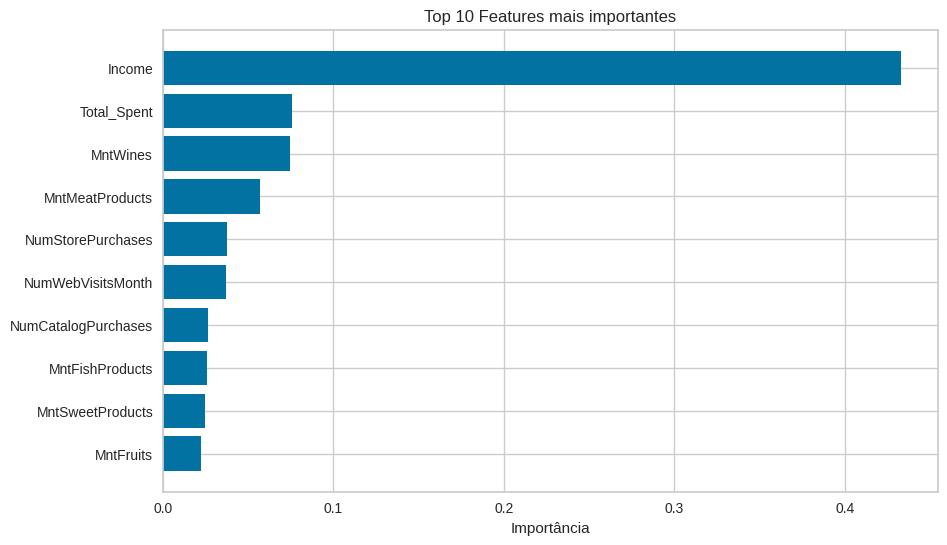

In [ ]:
# Extrair importâncias
importances = model.feature_importances_

# Criar dataframe para visualização
feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Ordenar do mais importante para o menos
feat_importances = feat_importances.sort_values(by='importance', ascending=False)

# Mostrar as 10 principais
print(feat_importances.head(10))

# Plotar gráfico para visualizar
plt.figure(figsize=(10,6))
plt.barh(feat_importances['feature'][:10][::-1], feat_importances['importance'][:10][::-1])
plt.title('Top 10 Features mais importantes')
plt.xlabel('Importância')
plt.show()


In [ ]:
top_features = [
    'Income', 'Total_Spent', 'MntWines', 'MntMeatProducts', 'NumStorePurchases',
    'NumWebVisitsMonth', 'NumCatalogPurchases', 'MntFishProducts', 'MntSweetProducts', 'MntFruits'
]


X_top = df[top_features]
y = df['Clusters']
# Listando das colunas/# Selecionando só essas colunas + alvo (Clusters)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=51)

model = RandomForestClassifier(random_state=51)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#treinando o modelo apenas comas 10 colunas

In [ ]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#avaliando perfomance

Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        95
           3       1.00      1.00      1.00       109

    accuracy                           1.00       424
   macro avg       1.00      1.00      1.00       424
weighted avg       1.00      1.00      1.00       424



In [ ]:
import joblib
joblib.dump(model, 'modelo_clusters_top10_rf.pkl')
#salvando modelo

['modelo_clusters_top10_rf.pkl']

In [ ]:
import joblib
model = joblib.load('modelo_clusters_top10_rf.pkl')

In [ ]:
cluster_names = {
    0: "Média Renda - Baixo Gasto",
    1: "Alta Renda - Alto Gasto",
    2: "Baixa Renda - Baixo Gasto",
    3: "Média Renda - Médio Gasto"
}
#definindo mapeamento do cluster

In [ ]:
def prever_cluster(novo_cliente_df, modelo, nomes_clusters):
    pred_num = modelo.predict(novo_cliente_df)[0]  # prevê o número do cluster
    pred_nome = nomes_clusters.get(pred_num, "Desconhecido")
    return pred_nome
#função para prever cluster

In [ ]:
novo_cliente = pd.DataFrame([{
    'Income': 50000,
    'Total_Spent': 700,
    'MntWines': 150,
    'MntMeatProducts': 100,
    'NumStorePurchases': 5,
    'NumWebVisitsMonth': 3,
    'NumCatalogPurchases': 2,
    'MntFishProducts': 50,
    'MntSweetProducts': 40,
    'MntFruits': 30
}])


In [ ]:
resultado = prever_cluster(novo_cliente, model, cluster_names)
print("Cliente pertence ao cluster:", resultado)
#prevendo ocluster nomeado

Cliente pertence ao cluster: Média Renda - Baixo Gasto
